In [9]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rcParams
import matplotlib.colors as mcolors
import matplotlib.patches as patches
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Computer Modern sans serif']
from IPython.core.display import HTML
import csv
%matplotlib inline
from matplotlib import rc
from matplotlib import ticker, cm
from matplotlib.ticker import FuncFormatter


from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter, LogFormatterSciNotation 
usetex: True

# Notation and conventions:

We use a lot of notation in this project, so I'll try to add here some relevant terminology. 

I also refer to the table I in 2502.08716 for a list of definitions of terms.

Here we often convert between SI units, astrophysical units (parsecs, etc), and natural units. These definitions are used in the functions frequently, so be careful about it. 

A quick reminder, natural units are defined by setting $\hbar = c = 1$. A quick list of conversions from natural units to SI units are given in https://www.phys.ufl.edu/~korytov/phz5354/note_01_NaturalUnits_SMsummary.pdf

This usually uses GeV as the reference, where many times I use eV, so be careful about that as well!

# Fundamental Equations:

I will give some background that is discussed in the paper. Ultimately, for the quadratic coupling case $\phi^2 \mathcal{O}_{\rm SM}$, then we can absorb these terms into a mass term for the $\phi$ field.

$\phi$-SM coupling:

$\mathcal{L}^{(\rm scalar)}_{\rm quad} = \frac{4\pi\,\phi^2}{M_{\rm pl}^2}
    \bigg(-d_{m_e}^{(2)}m_e \overline{e} e 
        + \frac{d_{e}^{(2)}}{4} F_{\mu \nu}F^{\mu \nu}
        + \frac{d_g^{(2)} \beta(g_s)}{2g_s}G_{\mu\nu}^a G^{a\mu\nu}\bigg)$

If we are in a medium, then the SM operator parts have non-zero expectation values:

 $\rho_i = \langle \rho | \mathcal{O}_{\rm SM}^i|\rho \rangle ~~~~~~~~~
    \rho_e = \langle \rho| ( m_e \bar{e}e )|\rho\rangle, ~~~
    \rho_\gamma = \langle \rho | (-\dfrac{1}{4}F_{\mu \nu}F^{\mu \nu} ) |\rho\rangle, ~~~
    \rho_N = \langle \rho | (-\dfrac{\beta(g_s)}{2g_s}G^a_{\mu \nu}G^{a\mu \nu} )|\rho\rangle  $

We can then just absorb these coefficients into the $\phi$ Lagrangian, specifically into the mass term.

$\mathcal{L} \supset  \frac{1}{2}\partial_{\mu}\phi \partial^{\mu} \phi - \frac{1}{2}(m_{\phi}^2+\beta) \phi^2 - \frac{\lambda}{4!}\phi^4$

where $\beta = \sum_i \dfrac{8\pi\,d_i^{(2)} \rho_i}{M_{\rm pl}^2}$

we will really be looking at $\beta$, and the effective mass, $m_{\rm eff}^2 = m_{\phi}^2 + \beta$, for the calculations.

# Source parameters:

We define five source parameters that we can map any spectrum onto. We should keep this methodology as well as add the ability use a concrete spectrum as an input. 

List of parameters:

$E_{\rm tot}$: the total energy emitted by the source into the $\phi$ signal

$\omega$: the average $\phi$ energy emitted by the source

$\delta \omega$: the spread in the energy that's emitted. This, together with $\omega$ gives a simple spectrum description.

$t_*$: the intrinsic burst duration. I.e. the amount of time it takes for the source to emit the signal.

$R$: the distance from the source to the Earth.

If we have a concrete spectrum, we would need to modify this part of the code. In principle what would be given is a energy of momentum spectrum. If this is the case, we would take each momentum mode, and propagate them individually using the methods described below, and then reconstructed (added together) at the Earth. We would need to be careful to preserve the timing of the signal. For instance, if the fastest mode reaches the Earth at a time T, we would want to propagate the rest of the modes for a time T, and then reconstruct the signal be inverse Fourier transforming the momentum modes back into the position space waveform. This would give us what the spectral shape would look like at the detector. Something like this.

# Propagation Equations:

The fundamental equations that are relevant for us is the group velocity and subsequently the time delay:

$v_g = \sqrt{1 - \frac{m_{\rm eff}^2}{\omega^2}}$

and the time delay is calculated via regular kinematics:

 $\delta t 
    \simeq~  \int_{0}^{R}dx ~ \bigg(\bigg(1- \dfrac{m^2_{\phi} + \beta(x)}{\omega^2}\bigg)^{-1/2} - 1\bigg)$

Notably, if the screening is absent, then we can easily calculate the time delay in the ultrarelativistic limit (which we checked must be the case unless the event is well within a parsec away, which is very unlikely):

$\delta t \simeq \frac{1}{2}R \frac{m^2}{\omega^2}$

So, we need $\omega/m$ to be large to get time delays that are small (which is also consistent with the relativistic case anyways), even in the absence of screening.

If we include screening, we need to include that the $\beta$ value is now a function of position, so the integral is necessary. We can do this by numerically integrating, or if we approximate each galaxy to have a constant density, we can choose to just integrate this piecewise, and then each piece has a constant density, and therefore can be analytically evaluated. 

1. For our work, Hani numerically integrated by using a density profile $n(H)$ as given in: https://academic.oup.com/pasj/article/68/1/5/2469978 and https://arxiv.org/abs/1604.05794. This was specifically for the case of the source that is within the Milky way.

2. We approximate the density of the galaxies to be constant for the extragalactic case. In this case we can use the analytic expression.

# Detection Equations

We treat detection in a relatively straightforward way. We rescale experiments that are sensitive to dark matter of the same coupling to the relativistic signal. The relativistic signal will have a shorter duration than the DM signal which is always there.

The sensitivities depend on the time via the simple scaling:

$\eta = \frac{\sigma}{\sqrt{T}}$

The $\sigma$ being intrinsic to the precision of the experiment. The sensitivity to the short duration bursts $\eta_*$ is then related to the DM sensitivity $\eta_{\rm DM}$ rescaled by the following equation:

$\eta_* =  \eta_{\rm DM} \frac{t_{\rm int,\, DM}^{1/4}
        {\rm min}\left(\tau_{\rm DM}^{1/4},t_{\rm int,\, DM}^{1/4}\right)}
        {{\rm min}\left(\tilde{t}_*^{1/4},t_{\rm int, *}^{1/4}\right)
        {\rm min}\left(\tau_*^{1/4},t_{\rm int, *}^{1/4}\right)}$

# Now, set up the functions:

In [2]:
# The duration of the signal and other quantities, such as the density of the phis at the Earth: 
# This depends on:
#1. Total energy emitted Etot,
#2. Mass of the phi field m,
#3. Phi energy w, 
#4. Intrinsic burst duration ts, 
#5. the distance R
#6. a parameter I have called aw: This parameterizes whether we have the minimum uncertainty relation or not. 
#  The uncertainty relationship is dw * ts >= 1. So, we can say that for a given wavepacket, dw * ts = aw where aw >= 1.
# That means, if aw = 1, we're talking about a Gaussian, since a Gaussian has the minimum uncertainty.


#Probably can define all of these conversion factors outside of the definitions. 


def signalduration(Etot,m , w, ts, R, aw): ### Duration of the signal
    ineV_to_pc = 0.197e-18 * 1e9/3.086e13   # eV^-1 to parsecs
    eV_to_solar = (1.67e-27/2e30)*1e-9      # 1 eV in solar masses
    sec_to_ineV = 1e-9/(6.528e-25)          # 1 second in eV^-1
    sec_in_year = 3.154e7                   # number of seconds in 1 year
    c = 3e8                                 # speed of light in m/s
    gcm3_to_eV4 = 4.247e18                  # g/cm^3 to eV^4
    vDM = 1e-3                              # Average velocity of galactic Dark Matter
    dt = 1 * 3.154e7                        # Integration time of 1 year = 3.154e7 seconds. This can be changed depending on the experiment.
    rm2 = 1/(4*np.pi*(R/ineV_to_pc)**2)     # The inverse square law: 1/(4piR^2) with a conversion factor. 
    dw = aw /(ts* sec_to_ineV)              # Spread in energies defined by ts and aw: Comes from uncertainty principle
    dx_burst = ts* sec_to_ineV              # Physical size of the phi wave at the source. Assume traveling at c = 1.
    dx_spread = (dw/w)*(m**2 / (w**2))*(R/ineV_to_pc)
    dx = dx_burst+dx_spread
    rho = (Etot/eV_to_solar)*rm2/dx
    rhoDM = 3.05e-6 #eV^4
    q = w/m
    delta_t_burst = ts*sec_to_ineV
    delta_t = np.sqrt(delta_t_burst**2 + ((dw/w)*(m**2 / (w**2))*(R/ineV_to_pc))**2)#((dw/w) * (R/ineV_to_pc)/(q**2 * np.sqrt(q**2 + 1)))/(sec_to_ineV)
    t_intDM = [1e6*sec_to_ineV for i in range(len(w))] 
    t_int = [(1/365)*sec_in_year*sec_to_ineV for i in range(len(w))] #year
    tau_s = 2*np.pi/dw +(2*np.pi*(R/ineV_to_pc)/(q**3 * m * delta_t_burst)) ###Convert the parsec conversion to AU conversion.
    tau_DM = (2*np.pi/(w * vDM**2))
    coherence = [((t_intDM[i]**(1/4))*min([t_intDM[i]**(1/4),tau_DM[i]**(1/4)]))/(min([t_int[i]**(1/4),delta_t[i]**(1/4)])*min([t_int[i]**(1/4),tau_s[i]**(1/4)])) for i in range(len(w))]
    return rho, coherence, rho/rhoDM, delta_t, tau_s  
    
def d_probe(w,rho,eta,Etot,m, ts, R, aw): ###Value of dilatonic coupling we can probe
    Mpl = 1.2e28
    phi = np.sqrt(2*rho)/w
    d = ((Mpl**2)*eta/(4*np.pi*phi**2)) * signalduration(Etot,m , w, ts, R, aw)[1]
    return d

def d1_probe(w,rho,eta,Etot,m, ts, R, aw):
    Mpl = 1.2e28
    phi = np.sqrt(rho)/(2*w)
    d = (Mpl)*eta/(2*np.sqrt(np.pi)*phi)
    return d


def d_from_Lambda(Lambda): #For supernova constraint
    Mpl = 1.2e28
    d = (1/(4*np.pi))*(Mpl/Lambda)**2
    return d

def d_from_delta_t(dt,L,m,E,Dg,K):
    Mpl = 1.2e28      # Planck mass in eV           
    c = 3e8           # Speed of light in m/s
#     rho_op_ex = 6.3e-4
    gcm3_to_eV4 = 4.247e18 #conversion from g/cm^3 to eV^4
    pc_to_meters = 3.086e16
    GPC = 1e9 #pc
#     rho_ISM = 6.2e-23 * K * gcm3_to_eV4 #density in g/cm^3 times the expectation value of the operator in normal matter times conversion to eV^4
#     rho_IGM = 3e-31 * K * gcm3_to_eV4   
    rho_ISM = 1.67e-24 * K * gcm3_to_eV4 #density in g/cm^3 times the expectation value of the operator in normal matter times conversion to eV^4
    rho_IGM = 1.67e-30 * K * gcm3_to_eV4   
    ng = 0.006e9 * (L**3)/(GPC**3)#1e6 #galaxies/Gpc^3
    
    k1 = np.array([((2*E[i]**2*(dt*c))/(L*pc_to_meters)) - m**2 for i in range(len(E))])
    k2 = Mpl**2/(2*4*np.pi)
    if L < 1e5:
#         rho_ISM = 37*rho_ISM
        d = np.array([(((E[i]**2)*(1 - (1/((dt*c)/(L*pc_to_meters) + 1)**2)) - m**2)/(8*np.pi*rho_ISM))*(Mpl**2) for i in range(len(E))])
    else:
        k1 = np.array([((2*E[i]**2*(dt*c))/(L*pc_to_meters)) - m**2 for i in range(len(E))])
        k3 = 1/((ng**(1/3) + 1)*Dg*rho_ISM + (1-(ng**(1/3)+1)*Dg)*rho_IGM)
        d = k3*k2*k1
    return d

def omegaoverm_noscreen(dt,L):
    c = 3e8
    pc_to_meters = 3.086e16
    L = L*pc_to_meters
    dt = dt*c
    return (L+dt)/(np.sqrt(dt * (2*L+dt)))

def d_screenearth(E,m,K): #Probably don't need this or the next for the ALP, but left it here just in case.
    Mpl = 1e28
    rho_op_ex = 1e-3
    gcm3_to_eV4 = 4.2e18
    rho_E = 5.5 * rho_op_ex * gcm3_to_eV4
    R = 6.371e6 * 5.07e6
    d = [((Mpl**2)/(2*4*np.pi*rho_E*K))*((1/(2*R)**2) + E[i]**2-m**2) for i in range(len(E))]
    return d


def d_screen(E,R,rho,m,K):
    Mpl = 1e28
    rho_op_ex = 1e-3
    gcm3_to_eV4 = 4.2e18
    d = [((Mpl**2)/(2*4*np.pi*rho*K))*((1/R**2) + E[i]**2-m**2) for i in range(len(E))]
    return d



In [3]:
m_bench = 1e-21 #in eV
m_bench2 = 1e-18
m_bench3 = 1e-15
ts_bench = 1
ts_bench2 = 1e2
R = 1e7 #in pc
if R == 1e4:
    distance = '10kpc'
elif R == 1e7:
    distance = '10Mpc'

Etot = 1 #Solar Masses
wmp_contour = np.logspace(0,30,1000)
coupling_type = 'electron'
coupling_order = 'linear'

if coupling_type == 'photon':
    K_space = 6.3e-4
    K_E = 1.9e-3
    K_atm = 9.5e-4
    eta = 1e-19/5900
    if coupling_order == 'linear':
        ylabel = r'$\log_{10}(d^{(1)}_e)$'
    if coupling_order == 'quad':    
        ylabel = r'$\log_{10}(d^{(2)}_e)$'
elif coupling_type == 'electron':
    K_space = 4.4e-4
    K_E = 2.4e-4
    K_atm = 2.7e-4
    eta = 1e-16
    if coupling_order == 'linear':
        ylabel = r'$\log_{10}(d^{(1)}_{m_e})$'
    if coupling_order == 'quad':    
        ylabel = r'$\log_{10}(d^{(2)}_{m_e})$'
elif coupling_type == 'gluon':
    K_space = 1.0
    K_E = 1.0
    K_atm = 1.0
    eta = 1e-24
    if coupling_order == 'linear':
        ylabel = r'$\log_{10}(d^{(1)}_g)$'
    if coupling_order == 'quad':    
        ylabel = r'$\log_{10}(d^{(2)}_g)$'
    
filename = distance+'_'+coupling_type+'_'+coupling_order+'_dilatoniccoupling.pdf' ###This needs to match with the if statement below, which sets up the labels

In [4]:
def plots(R,E,coupling_type,coupling_order):
    m_bench = 1e-21 #in eV
    m_bench2 = 1e-18
    m_bench3 = 1e-15
    ts_bench = 1
    ts_bench2 = 1e2
#     R = 1e7 #in pc
    if R == 1e4:
        distance = '10kpc'
    elif R == 1e7:
        distance = '10Mpc'

    Etot = 1 #Solar Masses
    wmp_contour = np.logspace(0,30,1000)
#     coupling_type = 'electron'
#     coupling_order = 'linear'

    if coupling_type == 'photon':
        K_space = 6.3e-4
        K_E = 1.9e-3
        K_atm = 9.5e-4
        eta = 1e-19/6000
        if coupling_order == 'linear':
            ylabel = r'$\log_{10}(d^{(1)}_e)$'
        if coupling_order == 'quad':    
            ylabel = r'$\log_{10}(d^{(2)}_e)$'
    elif coupling_type == 'electron':
        K_space = 4.4e-4
        K_E = 2.4e-4
        K_atm = 2.7e-4
        eta = 1e-17
        if coupling_order == 'linear':
            ylabel = r'$\log_{10}(d^{(1)}_{m_e})$'
        if coupling_order == 'quad':    
            ylabel = r'$\log_{10}(d^{(2)}_{m_e})$'
    elif coupling_type == 'gluon':
        K_space = 1.0
        K_E = 1.0
        K_atm = 1.0
        eta = 1e-24
        if coupling_order == 'linear':
            ylabel = r'$\log_{10}(d^{(1)}_g)$'
        if coupling_order == 'quad':    
            ylabel = r'$\log_{10}(d^{(2)}_g)$'

    filename = distance+'_'+coupling_type+'_'+coupling_order+'_dilatoniccoupling.pdf'

    
    fig, ax = plt.subplots(2,2,figsize = (30,21),sharex = True, sharey = True)
    plt.rcParams['mathtext.fontset'] = 'cm'
    plt.rcParams.update({'font.size': 35,'font.family':'STIXGeneral'})
    axis_font = {'fontname':'Times New Roman', 'size':'35'}
    plt.subplots_adjust(wspace = 0, hspace = 0)

    plt.rcParams['hatch.color'] = 'lightgray'



    ax[0,0].set_yscale('log')
    ax[0,0].set_xscale('log')
    def exponentlabel(x,pos):
        return str("{:.0f}".format(np.log10(x)))



    formatter = FuncFormatter(exponentlabel)

    mass = [[m_bench,m_bench2],[m_bench,m_bench2]] #np.logspace(-33,-5,100)
    ts = [[ts_bench,ts_bench],[ts_bench2,ts_bench2]]

    dt = 1 * 3.154e7 #year
    dt_100 = 100 * 3.154e7
    dt_1day = 60*60*24 #1day in seconds
    Elist = mass[0][0]*wmp_contour
    labels = [r'$\mathcal{E}_{\phi}= 10^5~m_{\phi}$',r'$\mathcal{E}_{\phi}= 10^7~m_{\phi}$']
    Lambda_earth_screen = [1e22 for i in range(len(Elist))] 
    d_earth_screen = [d_from_Lambda(1e22) for i in range(len(Elist))] 



    QuadSPC_x = []
    QuadSPC_y = []




    gcm3_to_eV4 = 4.2e18
    rho_E = 5.5 * K_E * gcm3_to_eV4        
    R_atm = 1e4* 5.07e6
    rho_atm = 1e-3 * K_atm * gcm3_to_eV4 
    R_exp = 1e0* 5.07e6
    rho_exp = 5.5 * K_E * gcm3_to_eV4 

    def E_from_uncert(ts):
        return ((2*np.pi)/ts)*(1/(1e-9/(6.528e-25)))




    tsample = np.logspace(-2,5,1000)



    Microscope_x = []
    Microscope_y = []


    EotWashEP_x = []
    EotWashEP_y = []

    FifthForce_x = []
    FifthForce_y = []

    with open('Linear Scalar Photon/MICROSCOPE.txt', 'r') as f:
        for line in f:
            Microscope_x.append([float(value) for value in line.strip().split()][0])
            Microscope_y.append([float(value) for value in line.strip().split()][1])

    with open('Linear Scalar Photon/EotWashEP.txt', 'r') as f:
        for line in f:
            EotWashEP_x.append([float(value) for value in line.strip().split()][0])
            EotWashEP_y.append([float(value) for value in line.strip().split()][1])


    with open('Linear Scalar Photon/FifthForce.txt', 'r') as f:
        for line in f:
            FifthForce_x.append([float(value) for value in line.strip().split()][0])
            FifthForce_y.append([float(value) for value in line.strip().split()][1])

    Microscope_m = [Microscope_y[0] for i in range(len(Elist))]
    FifthForce_m = [FifthForce_y[0] for i in range(len(Elist))]


    QuadSPC_x = []
    QuadSPC_y = []


    rho_op_ex = 6.3e-4
    gcm3_to_eV4 = 4.2e18
    rho_E = 5.5 * rho_op_ex * gcm3_to_eV4        
    R_atm = 1e4* 5.07e6
    rho_atm = 1e-3 * rho_op_ex * gcm3_to_eV4 
    R_exp = 1e0* 5.07e6
    rho_exp = 5.5 * rho_op_ex * gcm3_to_eV4 
    rho_ISM = 1.64*1.67e-24 * gcm3_to_eV4

    def E_from_uncert(ts):
        return (2*np.pi/ts)*(1/(1e-9/(6.528e-25)))




    tsample = np.logspace(-2,5,1000)

    if coupling_order == 'linear':    
        for i in range(2):
            for j in range(2):
                ax[i,j].xaxis.set_major_formatter(formatter)
                ax[i,j].yaxis.set_major_formatter(formatter)
                ax[i,j].set_xticks(np.logspace(-20,-6,7))
                ax[i,j].set_xlim(.3e-20,0.9e-6)
                ax[i,j].set_ylim(1e-9,0.9e0)
                ax[i,j].tick_params(direction="in")


                ax[i,j].plot(Elist,Microscope_m,color = 'gray',linewidth = 2)
                ax[i,j].fill_between(Elist,Microscope_m,[1e50 for i in range(len(Elist))],color = 'gray',alpha = 0.1)
                ax[i,j].text(3.5e-11,Microscope_m[0]*1.3,r'${\rm MICROSCOPE}$',color = 'k')
                #ax[i,j].plot(EotWashEP_x,EotWashEP_y)
                ax[i,j].plot(Elist,FifthForce_m)
                colorlist = ["tab:red", "tab:orange",'tab:purple']

                ax[i,j].plot([E_from_uncert(ts[i][j]),E_from_uncert(ts[i][j])],[1e50,1e-50],color = 'chocolate',linestyle = '--')
                ax[i,j].fill_between([1e-50,E_from_uncert(ts[i][j])],[1e-50,1e-50],[1e50,1e50], color = 'chocolate',alpha = 0.1)


                ax[i,j].plot(m_bench*wmp_contour,d1_probe(Elist,signalduration(Etot,mass[i][j],Elist,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1),c = 'k',linewidth = 2,alpha = 1)
#                 print(min(d1_probe(Elist,signalduration(Etot,mass[i][j],Elist,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)))
                ax[i,j].plot([mass[i][j],mass[i][j]],[1e-50,1e50],c = 'k',linestyle = '--')
                ax[i,j].fill_between([1e-30,mass[i][j]],1e-50,1e50,facecolor = 'none',hatch = "/",edgecolor = 'k',alpha = 0.3)
                #print(signalduration(Etot,mass[i][j],Elist,ts[i][j],R,1)[1])
                if mass[i][j]>1e-20:
                    ax[i,j].text(mass[i][j]/2e2,1e-7,r'$\omega<m_{\phi}$',color = 'k',bbox=dict(facecolor='whitesmoke', alpha = 1, edgecolor='k',boxstyle='round,pad=.1'))

                if R < 1e5:
                    fillregion_x = np.array([Elist[l] for l in range(len(Elist)) if all([Elist[l]>E_from_uncert(ts[i][j]), Elist[l]> mass[i][j]*omegaoverm_noscreen(dt_1day,R)])])
        #             fillregion_y = [min([d_screen(fillregion_x,R_exp,rho_exp,mass[i][j])[l],d_from_delta_t(dt_1day,R,mass[i][j],fillregion_x,30e-6)[l]]) for l in range(len(fillregion_x))]
                    fillregion_y = [Microscope_m[l] for l in range(len(fillregion_x))]

                    ax[i,j].fill_between(fillregion_x,d1_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1),fillregion_y,where= d1_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)< fillregion_y, color = 'tab:green',alpha = 0.3)
                    ax[i,j].plot(Elist, d_from_delta_t(dt_1day,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[2],linewidth = 2,linestyle = '--'  )
                    ax[i,j].plot(Elist, d_from_delta_t(dt,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[0],linewidth = 2,linestyle = '--'  )
#                     print(min(d1_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)))
                else:
                    fillregion_x = np.array([Elist[l] for l in range(len(Elist)) if all([Elist[l]>E_from_uncert(ts[i][j]), Elist[l]> mass[i][j]*omegaoverm_noscreen(dt_1day,R)])])
                    fillregion_y = [Microscope_m[l] for l in range(len(fillregion_x))]
        #             fillregion_y = [min([d_screen(fillregion_x,R_exp,rho_exp,mass[i][j])[l],d_from_delta_t(dt_1day,R,mass[i][j],fillregion_x,1e-6)[l]]) for l in range(len(fillregion_x))]
                    ax[i,j].fill_between(fillregion_x,d1_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1),fillregion_y,where= d1_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)< fillregion_y, color = 'tab:green',alpha = 0.3)
#                     ax[i,j].fill_between(Elist,d_from_delta_t(dt_1day,R,mass[i][j],Elist,1e-6,K_space),d_from_delta_t(dt_1day,R,mass[i][j],Elist,30e-6,K_space),color = colorlist[2],alpha = 0.1)
#                     ax[i,j].fill_between(Elist,d_from_delta_t(dt,R,mass[i][j],Elist,1e-6,K_space),d_from_delta_t(dt,R,mass[i][j],Elist,30e-6,K_space),color = colorlist[0],alpha = 0.1)
                    ax[i,j].plot(Elist, d_from_delta_t(dt_1day,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[2],linewidth = 2,linestyle = '--'  )
                    ax[i,j].plot(Elist, d_from_delta_t(dt,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[0],linewidth = 2,linestyle = '--'  )
#                     print(min(d1_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)))

                if filename == '10Mpc_'+coupling_type+'_linear_dilatoniccoupling.pdf':
                    ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt,R)/4,1e-7,r'$\delta t\, \gtrsim \, 1~{\rm yr}~ \uparrow $',rotation = 90, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:red',boxstyle='round,pad=.1'))
                    ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt_1day,R)/4,1e-7,r'$\delta t\, \gtrsim \, 1~{\rm day}~ \uparrow$',rotation = 90, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:purple',boxstyle='round,pad=.1'))
                    ax[i,j].text(E_from_uncert(ts[i][j])/2e2,1e-1,r'$\omega\,t_{*} \lesssim \, 2\pi$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 1, edgecolor='chocolate',boxstyle='round,pad=.1'))
                    if coupling_type == 'photon':
                        if i == 1:
                            if j == 1:
                                ax[i,j].text(5e-12,4e-9,r'$E_{\rm tot} = M_{\odot}$'+'\n' +r'$R = 10~{\rm Mpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/5900$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'electron':
                        if i == 1:
                            if j == 1:
                                ax[i,j].text(2e-11,4e-9,r'$E_{\rm tot} =  M_{\odot}$'+'\n' +r'$R = 10~{\rm Mpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-17}$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'gluon':
    #                     ax[i,j].set_ylim(.5e7,8e32)
                        if i == 1:
                            if j == 1:
                                ax[i,j].text(2e-11,4e-9,r'$E_{\rm tot} =  M_{\odot}$'+'\n' +r'$R = 10~{\rm Mpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/10^5$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                if filename == '10kpc_'+coupling_type+'_linear_dilatoniccoupling.pdf':
                    ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt,R)/4,1e-7,r'$\delta t\, \gtrsim \, 1~{\rm yr}~ \uparrow $',rotation = 90, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:red',boxstyle='round,pad=.1'))
                    ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt_1day,R)/4,1e-7,r'$\delta t\, \gtrsim \, 1~{\rm day}~ \uparrow$',rotation = 90, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:purple',boxstyle='round,pad=.1'))
        #             ax[i,j].text(3e-17,4e25,r'$\delta t\, \gtrsim \, 1~{\rm yr}~\uparrow$',rotation = 90, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='tab:red',boxstyle='round,pad=.1'))
        #             ax[i,j].text(6e-16,2e25,r'$\delta t\, \gtrsim \, 1~{\rm day}~\uparrow$',rotation = 90, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='tab:purple',boxstyle='round,pad=.1'))
                    if coupling_type == 'photon':
                        if i == 1:
                            if j == 1:
                                ax[i,j].text(5e-12,4e-9,r'$E_{\rm tot} = 10^{-2} M_{\odot}$'+'\n' +r'$R = 10~{\rm kpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/5900$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'electron':
                        if i == 1:
                            if j == 1:
                                ax[i,j].text(2e-11,4e-9,r'$E_{\rm tot} = 10^{-2} M_{\odot}$'+'\n' +r'$R = 10~{\rm kpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-17}$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'gluon':
    #                     ax[i,j].set_ylim(.5e7,8e32)
                        if i == 1:
                            if j == 1:
                                ax[i,j].text(2e-11,4e-9,r'$E_{\rm tot} = 10^{-2} M_{\odot}$'+'\n' +r'$R = 10~{\rm kpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/10^5$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                                #             ax[i,j].text(4e-20,2e29,r'$\omega_{\phi}\,t_{*} \lesssim \, 1$',color = 'tab:brown')
                    #ax[i,j].text(E_from_uncert(ts[i][j])/2e2,3e29,r'$\omega_{\phi}\,t_{*} \lesssim \, 1$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='chocolate',boxstyle='round,pad=.1'))
                    ax[i,j].text(1e-20,1e-2,r'$\omega\,t_{*} \lesssim \, 2\pi$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 1, edgecolor='chocolate',boxstyle='round,pad=.1'))
                ax[0,j].set_title(r'$\log_{10}(m_{\phi}/{\rm eV}) = $'+str(int(np.log10(mass[0][j]))), pad = 20)
                ax[i,1].set_ylabel(r'$t_*$ = '+str(int(ts[i][0]))+r' s',labelpad = 40,rotation = 270)
                ax[i,1].yaxis.set_label_position("right")




    if coupling_order == 'quad':    
        for i in range(2):
            for j in range(2):
                ax[i,j].xaxis.set_major_formatter(formatter)
                ax[i,j].yaxis.set_major_formatter(formatter)
                ax[i,j].set_xticks(np.logspace(-20,-6,7))
                ax[i,j].set_xlim(.3e-20,0.9e-6)
                ax[i,j].tick_params(direction="in")

                ax[i,j].fill_between(Elist, d_screenearth(Elist,mass[i][j],K_E), 1e100, color = 'tab:blue', alpha = .05)
                ax[i,j].plot(Elist,d_screen(Elist,R_atm,rho_atm,mass[i][j],K_atm), color = 'tab:blue',linestyle = 'dashed')
                ax[i,j].plot(Elist,d_screen(Elist,R_exp,rho_exp,mass[i][j],K_E), color = 'tab:blue',linestyle = 'dotted')
                ax[i,j].plot(Elist,d_screenearth(Elist,mass[i][j],K_E),color = 'tab:blue',linewidth = 3)
                print(min(d_screenearth(Elist,mass[i][j],K_E)),min(d_screen(Elist,R_exp,rho_exp,mass[i][j],K_E)))
                ax[i,j].plot(QuadSPC_x,QuadSPC_y, color='k',linewidth = 3)
                ax[i,j].fill_between(QuadSPC_x,QuadSPC_y,1e100,color = 'k',alpha = 0.05)
                colorlist = ["tab:red", "tab:orange",'tab:purple']

                ax[i,j].plot([E_from_uncert(ts[i][j]),E_from_uncert(ts[i][j])],[1e50,1e-50],color = 'chocolate',linestyle = '--')
                ax[i,j].fill_between([1e-50,E_from_uncert(ts[i][j])],[1e-50,1e-50],[1e50,1e50], color = 'chocolate',alpha = 0.1)


                ax[i,j].plot(m_bench*wmp_contour,d_probe(Elist,signalduration(Etot,mass[i][j],Elist,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1),c = 'k',linewidth = 2,alpha = 1)
#                 ax[i,j].plot(m_bench*wmp_contour,d_probe(Elist,signalduration(Etot,mass[i][j],Elist,ts[i][j],R,1)[0],eta,Etot,2*mass[i][j],ts[i][j],R,1)/denom(Elist,rho_ISM*K_space,eta,Etot,ts[i][j],R,K_space),c = 'k',linewidth = 2,alpha = 1,linestyle = '--')
#                 print(min(d_probe(Elist,signalduration(Etot,mass[i][j],Elist,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)))
                ax[i,j].plot([mass[i][j],mass[i][j]],[1e-10,1e50],c = 'k',linestyle = '--')
                ax[i,j].fill_between([1e-30,mass[i][j]],1e-10,1e50,facecolor = 'none',hatch = "/",edgecolor = 'k',alpha = 0.3)
                #print(signalduration(Etot,mass[i][j],Elist,ts[i][j],R,1)[1])
                if mass[i][j]>1e-20:
                    ax[i,j].text(mass[i][j]/2e2,1e12,r'$\omega<m_{\phi}$',color = 'k',bbox=dict(facecolor='whitesmoke', alpha = 1, edgecolor='k',boxstyle='round,pad=.1'))

                if R < 1e5:
                    ax[i,j].plot(Elist, d_from_delta_t(dt_1day,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[2],linewidth = 2,linestyle = '--'  )
                    ax[i,j].plot(Elist, d_from_delta_t(dt,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[0],linewidth = 2,linestyle = '--'  )
                    fillregion_x = np.array([Elist[l] for l in range(len(Elist)) if Elist[l]>E_from_uncert(ts[i][j])])
                    fillregion_y = [min([d_screen(fillregion_x,R_exp,rho_exp,mass[i][j],K_E)[l],d_from_delta_t(dt_1day,R,mass[i][j],fillregion_x,30e-6,K_space)[l]]) for l in range(len(fillregion_x))]
        #             fillregion2_x = np.array([Elist[l] for l in range(len(Elist)) if Elist[l]>E_from_uncert(ts[i][j])])
        #             fillregion2_y = [max([d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j])[l],d_from_delta_t(dt_1day,R,mass[i][j],fillregion2_x,1e-6)[l]]) if d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j])[l] > d_from_delta_t(dt_1day,R,mass[i][j],fillregion2_x,1e-6)[l] else d_probe(fillregion2_x[l],signalduration(Etot,mass[i][j],fillregion2_x[l],ts[i][j],R,1)[0],eta) for l in range(len(fillregion2_x))]
                    ax[i,j].fill_between(fillregion_x,d_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1),fillregion_y,where= d_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)< fillregion_y, color = 'tab:green',alpha = 0.3)
        #             ax[i,j].fill_between(fillregion2_x,d_probe(fillregion2_x,signalduration(Etot,mass[i][j],fillregion2_x,ts[i][j],R,1)[0],eta),fillregion2_y,where= d_probe(fillregion2_x,signalduration(Etot,mass[i][j],fillregion2_x,ts[i][j],R,1)[0],eta)< fillregion2_y, color = 'tab:orange',alpha = 0.3)
                    #ax[i,j].fill_between(fillregion2_x,[max(d_from_delta_t(dt_1day,R,mass[i][j],fillregion2_x,30e-6),d_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta))],fillregion2_y,where= d_probe(fillregion2_x,signalduration(Etot,mass[i][j],fillregion2_x,ts[i][j],R,1)[0],eta)< fillregion2_y, color = 'tab:orange',alpha = 0.3)
#                    print(min(d_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)))
                    #ax[i,j].plot(fillregion2_x,fillregion2_y,linestyle = '-.',linewidth = 4, color = 'pink')

                else:
                    ax[i,j].plot(Elist, d_from_delta_t(dt_1day,R,mass[i][j],Elist,1e-6,K_space), color = colorlist[2],linewidth = 2,linestyle = '--'  )
                    ax[i,j].plot(Elist, d_from_delta_t(dt,R,mass[i][j],Elist,1e-6,K_space), color = colorlist[0],linewidth = 2,linestyle = '--'  )
                    ax[i,j].plot(Elist, d_from_delta_t(dt_1day,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[2],linewidth = 2,linestyle = '--'  )
                    ax[i,j].plot(Elist, d_from_delta_t(dt,R,mass[i][j],Elist,30e-6,K_space), color = colorlist[0],linewidth = 2,linestyle = '--'  )
                    fillregion_x = np.array([Elist[l] for l in range(len(Elist)) if Elist[l]>E_from_uncert(ts[i][j])])
                    fillregion_y = [min([d_screen(fillregion_x,R_exp,rho_exp,mass[i][j],K_E)[l],d_from_delta_t(dt_1day,R,mass[i][j],fillregion_x,1e-6,K_space)[l]]) for l in range(len(fillregion_x))]
        #             fillregion2_x = np.array([Elist[l] for l in range(len(Elist)) if Elist[l]>E_from_uncert(ts[i][j])])
        #             fillregion2_y = [max([d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j])[l],d_from_delta_t(dt,R,mass[i][j],fillregion2_x,1e-6)[l]]) if d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j])[l] > d_from_delta_t(dt_1day,R,mass[i][j],fillregion2_x,1e-6)[l] else d_probe(fillregion2_x[l],signalduration(Etot,mass[i][j],fillregion2_x[l],ts[i][j],R,1)[0],eta) for l in range(len(fillregion2_x))]
        #             fillregion2_y = [min([d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j])[l],d_from_delta_t(dt,R,mass[i][j],fillregion2_x,1e-6)[l]]) for l in range(len(fillregion2_x)) if d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j])[l] < d_from_delta_t(dt_1day,R,mass[i][j],fillregion2_x,1e-6)[l] else d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j])[l]]
                    ax[i,j].fill_between(fillregion_x,d_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1),fillregion_y,where= d_probe(fillregion_x,signalduration(Etot,mass[i][j],fillregion_x,ts[i][j],R,1)[0],eta,Etot,mass[i][j],ts[i][j],R,1)< fillregion_y, color = 'tab:green',alpha = 0.3)
        #             ax[i,j].fill_between(fillregion2_x,[max(d_probe(fillregion2_x,signalduration(Etot,mass[i][j],fillregion2_x,ts[i][j],R,1)[0],eta)[l],d_screen(fillregion2_x,R_exp,rho_exp,mass[i][j]))[l] for l in range(len(fillregion2_x))],fillregion2_y,where= d_probe(fillregion2_x,signalduration(Etot,mass[i][j],fillregion2_x,ts[i][j],R,1)[0],eta)< fillregion2_y, color = 'tab:orange',alpha = 0.3)
                    ax[i,j].fill_between(Elist,d_from_delta_t(dt_1day,R,mass[i][j],Elist,1e-6,K_space),d_from_delta_t(dt_1day,R,mass[i][j],Elist,30e-6,K_space),color = colorlist[2],alpha = 0.1)
                    ax[i,j].fill_between(Elist,d_from_delta_t(dt,R,mass[i][j],Elist,1e-6,K_space),d_from_delta_t(dt,R,mass[i][j],Elist,30e-6,K_space),color = colorlist[0],alpha = 0.1)

                
                if coupling_type == 'photon': 
                    ax[i,j].set_ylim(.5e6,8e32)
                    ax[i,j].text(1e-19,3e29,r'$\omega\,t_{*} \lesssim \, 2\pi$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 1, edgecolor='chocolate',boxstyle='round,pad=.1'))
                    ax[i,j].text(1.5e-20,3e31,r'${\rm Supernova}~\gamma \gamma \rightarrow \phi \phi$', fontsize =30, color = 'black')
                    ax[i,j].plot(Elist, [d_from_Lambda(1e12) for i in range(len(Elist))], color = 'gray',linewidth = 3)
                    ax[i,j].fill_between(Elist, [d_from_Lambda(1e12) for i in range(len(Elist))], 1e100, color = 'gray', alpha = 0.1)
                    
                    
                if coupling_type == 'electron': 
                    ax[i,j].set_ylim(.5e9,5e33)
                    ax[i,j].text(1e-19,3e29,r'$\omega\,t_{*} \lesssim \, 2\pi$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 1, edgecolor='chocolate',boxstyle='round,pad=.1'))
                    ax[i,j].text(1.5e-20,1e32,r'${\rm Supernova}~e^+ e^- \rightarrow \phi \phi$', fontsize =30, color = 'black')
                    ax[i,j].plot(Elist, [5e31 for i in range(len(Elist))], color = 'gray',linewidth = 3)
                    ax[i,j].fill_between(Elist, [5e31 for i in range(len(Elist))], 1e100, color = 'gray', alpha = 0.1)
                    
                if coupling_type == 'gluon': 
                    ax[i,j].set_ylim(.5e4,5e30)
                    ax[i,j].text(1e-19,3e26,r'$\omega\,t_{*} \lesssim \, 2\pi$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 1, edgecolor='chocolate',boxstyle='round,pad=.1'))
                    ax[i,j].text(1.5e-20,3e29,r'${\rm Supernova}~N N \rightarrow N N \phi \phi$', fontsize =30, color = 'black')
                    ax[i,j].plot(Elist, [d_from_Lambda(15e12) for i in range(len(Elist))], color = 'gray',linewidth = 3)
                    ax[i,j].fill_between(Elist, [d_from_Lambda(15e12) for i in range(len(Elist))], 1e100, color = 'gray', alpha = 0.1)


                if filename == '10Mpc_'+coupling_type+'_quad_dilatoniccoupling.pdf':
                    ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt,R)/4,1e16,r'$\delta t\, \gtrsim \, 1~{\rm yr}~ \uparrow $',rotation = 90, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:red',boxstyle='round,pad=.1'))
                    ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt_1day,R)/4,1e16,r'$\delta t\, \gtrsim \, 1~{\rm day}~ \uparrow$',rotation = 90, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:purple',boxstyle='round,pad=.1'))
#                     ax[i,j].text(E_from_uncert(ts[i][j])/2e2,3e29,r'$\omega\,t_{*} \lesssim \, 2\pi$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='chocolate',boxstyle='round,pad=.1'))
                    if coupling_type == 'photon':
                        ax[i,j].text(3e-13,2e12/K_E,r'$d_{e,{\rm crit}}^{(2)\, \rm\oplus}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(1e-12,5e21/K_atm,r'$d_{e,{\rm crit}}^{(2)\, \rm atm}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(5e-11,7e25/K_E,r'$d_{e,{\rm crit}}^{(2)\, \rm app}$', fontsize =35, color = 'tab:blue')
                        if i == 1 and j ==1:
                            ax[i,j].text(1e-11,1e7,r'$E_{\rm tot} = M_{\odot}$'+'\n' +r'$R = 10~{\rm Mpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/5900$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'electron':
                        ax[i,j].text(2e-13,2e11/K_E,r'$d_{m_e,{\rm crit}}^{(2)\, \rm\oplus}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(2e-12,1e19/K_atm,r'$d_{m_e,{\rm crit}}^{(2)\, \rm atm}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(1e-10,7e25/K_E,r'$d_{m_e,{\rm crit}}^{(2)\, \rm app}$', fontsize =35, color = 'tab:blue')
                        if i == 1 and j==1:
                            ax[i,j].text(1e-10,1e10,r'$E_{\rm tot} = M_{\odot}$'+'\n' +r'$R = 10~{\rm Mpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-17}$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'gluon':
                        ax[i,j].text(2e-13,2e11/K_E,r'$d_{g,{\rm crit}}^{(2)\, \rm\oplus}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(2e-12,1e19/K_atm,r'$d_{g,{\rm crit}}^{(2)\, \rm atm}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(5e-12,7e25/K_E,r'$d_{g,{\rm crit}}^{(2)\, \rm app}$', fontsize =35, color = 'tab:blue')
#                         ax[i,j].set_ylim(.5e7,8e32)
                        if i == 1 and j==1:
                            ax[i,j].text(1e-11,1e5,r'$E_{\rm tot} = M_{\odot}$'+'\n' +r'$R = 10~{\rm Mpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/10^5$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

#                     if i == 1:
#                         if j == 1:
#                             ax[i,j].text(1e-10,1e12,r'$E_{\rm tot} = M_{\odot}$'+'\n' +r'$R =$'+str(int(R/1e6))+r'$~{\rm Mpc}$'+ '\n'+r'$\,\eta = 10^{-19}$',bbox=dict(facecolor='tab:purple', alpha = 0.1,edgecolor = 'white',boxstyle='round,pad=.5'))

                if filename == '10kpc_'+coupling_type+'_quad_dilatoniccoupling.pdf':
        #             ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt,R)/4,1e16,r'$\delta t\, \gtrsim \, 1~{\rm yr}~ \uparrow $',rotation = 90, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='tab:red',boxstyle='round,pad=.1'))
        #             ax[i,j].text(mass[i][j]*omegaoverm_noscreen(dt_1day,R)/4,1e16,r'$\delta t\, \gtrsim \, 1~{\rm day}~ \uparrow$',rotation = 90, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='tab:purple',boxstyle='round,pad=.1'))
                    if coupling_type == 'photon':
                        ax[i,j].text(7e-15,2e13/K_E,r'$d_{e,{\rm crit}}^{(2)\, \rm\oplus}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(2e-12,1e19/K_atm,r'$d_{e,{\rm crit}}^{(2)\, \rm atm}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(5e-11,7e25/K_E,r'$d_{e,{\rm crit}}^{(2)\, \rm app}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(3e-17,1e27,r'$\delta t\, \gtrsim \, 1~{\rm yr}~\uparrow$',rotation = 37, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:red',boxstyle='round,pad=.1'))
                        ax[i,j].text(6e-16,9e26,r'$\delta t\, \gtrsim \, 1~{\rm day}~\uparrow$',rotation = 37, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:purple',boxstyle='round,pad=.1'))
                        if i == 1 and j==1:
                            ax[i,j].text(1e-11,1e8,r'$E_{\rm tot} = 10^{-2} M_{\odot}$'+'\n' +r'$R = 10~{\rm kpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/5900$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'electron':
                        ax[i,j].text(5e-15,2e9/K_E,r'$d_{m_e,{\rm crit}}^{(2)\,\rm\oplus}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(2e-13,5e21/K_atm,r'$d_{m_e,{\rm crit}}^{(2)\, \rm atm}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(5e-11,7e25/K_E,r'$d_{m_e,{\rm crit}}^{(2)\,\rm app}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(3e-17,8.5e26,r'$\delta t\, \gtrsim \, 1~{\rm yr}~\uparrow$',rotation = 39, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:red',boxstyle='round,pad=.1'))
                        ax[i,j].text(6e-16,8e26,r'$\delta t\, \gtrsim \, 1~{\rm day}~\uparrow$',rotation = 39, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:purple',boxstyle='round,pad=.1'))
                        if i == 1 and j==1:
                            ax[i,j].text(1e-11,1e10,r'$E_{\rm tot} = 10^{-2} M_{\odot}$'+'\n' +r'$R = 10~{\rm kpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-17}$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    elif coupling_type == 'gluon':
                        ax[i,j].set_ylim(.5e5,8e30)
                        ax[i,j].text(2e-14,2e9/K_E,r'$d_{g,{\rm crit}}^{(2)\, \rm\oplus}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(2e-12,1e19/K_atm,r'$d_{g,{\rm crit}}^{(2)\, \rm atm}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(5e-11,7e25/K_E,r'$d_{g,{\rm crit}}^{(2)\, \rm app}$', fontsize =35, color = 'tab:blue')
                        ax[i,j].text(3e-17,6e23,r'$\delta t\, \gtrsim \, 1~{\rm yr}~\uparrow$',rotation = 38, fontsize = 25, color = 'tab:red',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:red',boxstyle='round,pad=.1'))
                        ax[i,j].text(6e-16,5e23,r'$\delta t\, \gtrsim \, 1~{\rm day}~\uparrow$',rotation = 38, fontsize = 25, color = 'tab:purple',bbox=dict(facecolor='white', alpha = 1, edgecolor='tab:purple',boxstyle='round,pad=.1'))
                        if i == 1 and j==1:
                            ax[i,j].text(1e-11,1e7,r'$E_{\rm tot} = 10^{-2} M_{\odot}$'+'\n' +r'$R = 10~{\rm kpc}$'+ '\n'+r'$\,\eta_{\rm DM} = 10^{-19}/10^5$',bbox=dict(facecolor='tab:purple', alpha = 0.0,edgecolor = 'white',boxstyle='round,pad=.2'))

                    #             ax[i,j].text(4e-20,2e29,r'$\omega_{\phi}\,t_{*} \lesssim \, 1$',color = 'tab:brown')
                    #ax[i,j].text(E_from_uncert(ts[i][j])/2e2,3e29,r'$\omega_{\phi}\,t_{*} \lesssim \, 1$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='chocolate',boxstyle='round,pad=.1'))
#                     ax[i,j].text(1e-19,3e29,r'$\omega\,t_{*} \lesssim \, 2\pi$',color = 'tab:brown',bbox=dict(facecolor='white', alpha = 0.8, edgecolor='chocolate',boxstyle='round,pad=.1'))
                ax[0,j].set_title(r'$\log_{10}(m_{\phi}/{\rm eV}) = $'+str(int(np.log10(mass[0][j]))), pad = 20)
                ax[i,1].set_ylabel(r'$t_*$ = '+str(int(ts[i][0]))+r' s',labelpad = 40,rotation = 270)
                ax[i,1].yaxis.set_label_position("right")




    shadowaxes = fig.add_subplot(111, xticks=[], yticks=[], frame_on=False)
    shadowaxes.set_ylabel(ylabel,fontsize = 45)
    shadowaxes.set_xlabel(r'$\log_{10}(\omega/\rm{eV})$',fontsize= 45)
    shadowaxes.xaxis.labelpad=50
    shadowaxes.yaxis.labelpad=50



    plt.savefig(filename,dpi = 1500)
    plt.show()

In [5]:
coupling_types = ['photon','electron','gluon']
coupling_orders = ['linear','quad']
R_EG = 1e7
E_EG = 1
R_GC = 1e4
E_GC = 1e-2

# plots(R_GC,E_GC,'gluon','quad')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern sans serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern sans serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern sans serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern sans serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern sans serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern sans serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern sans serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern san

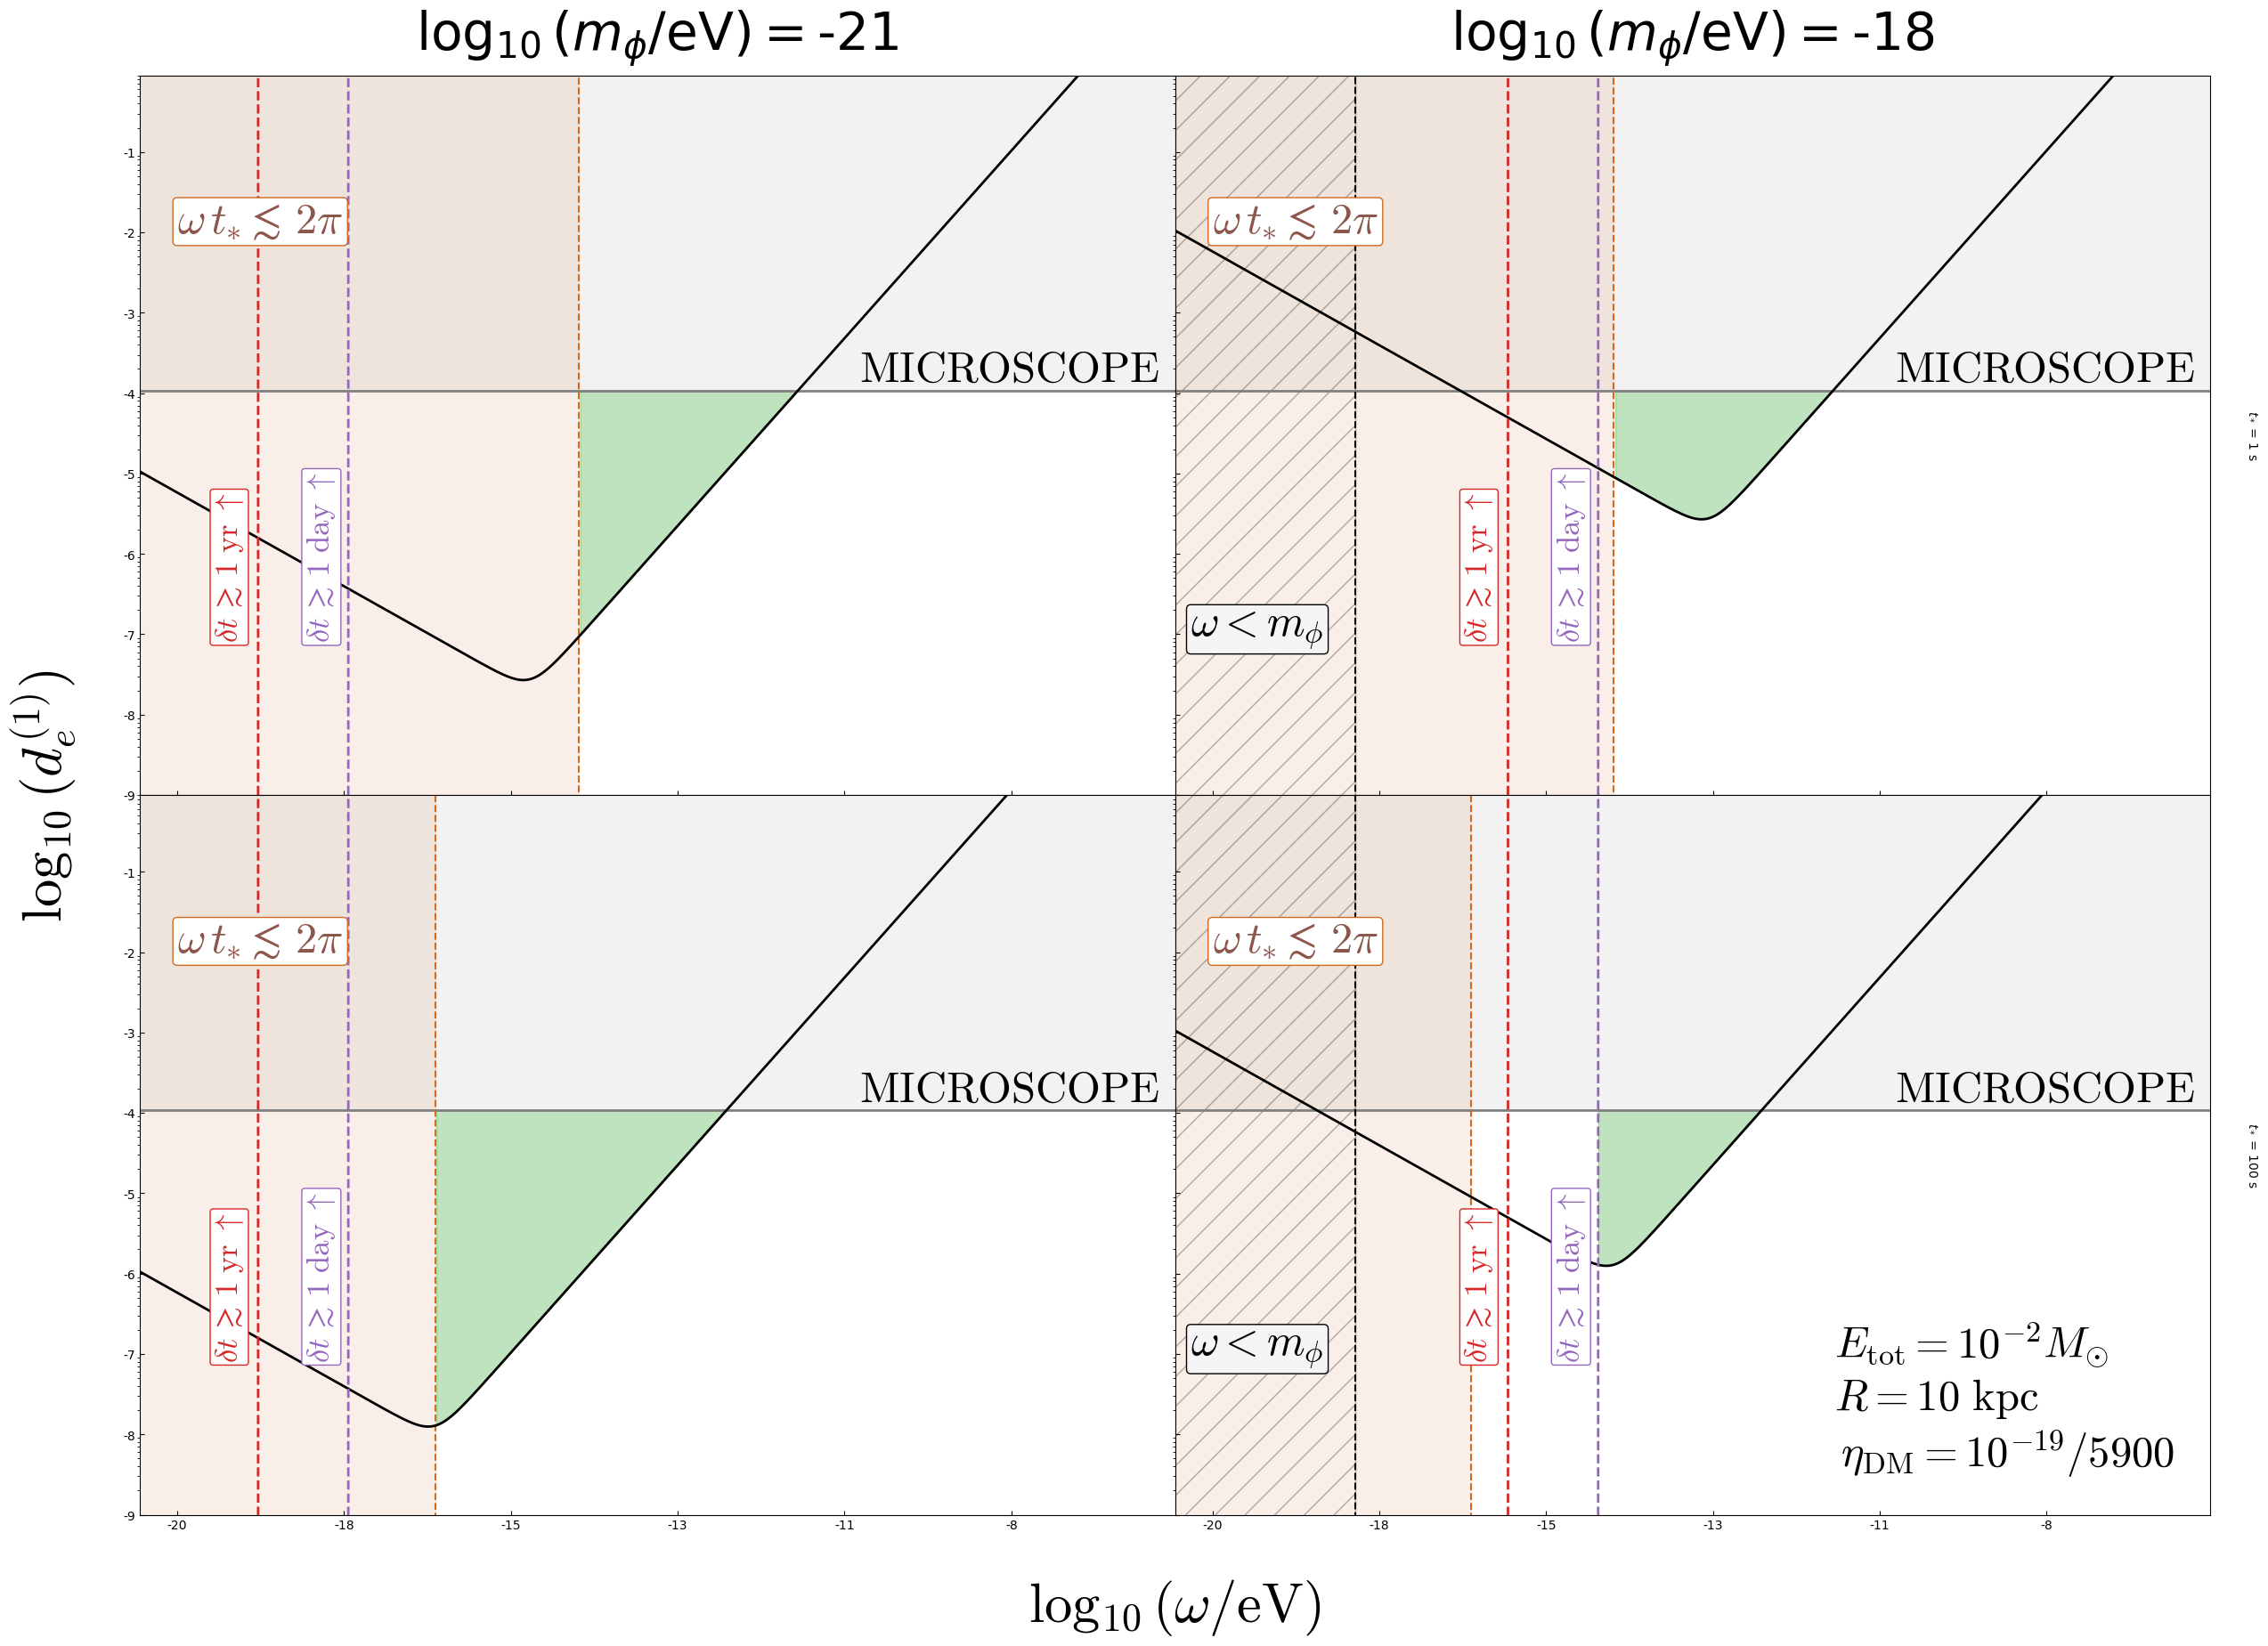

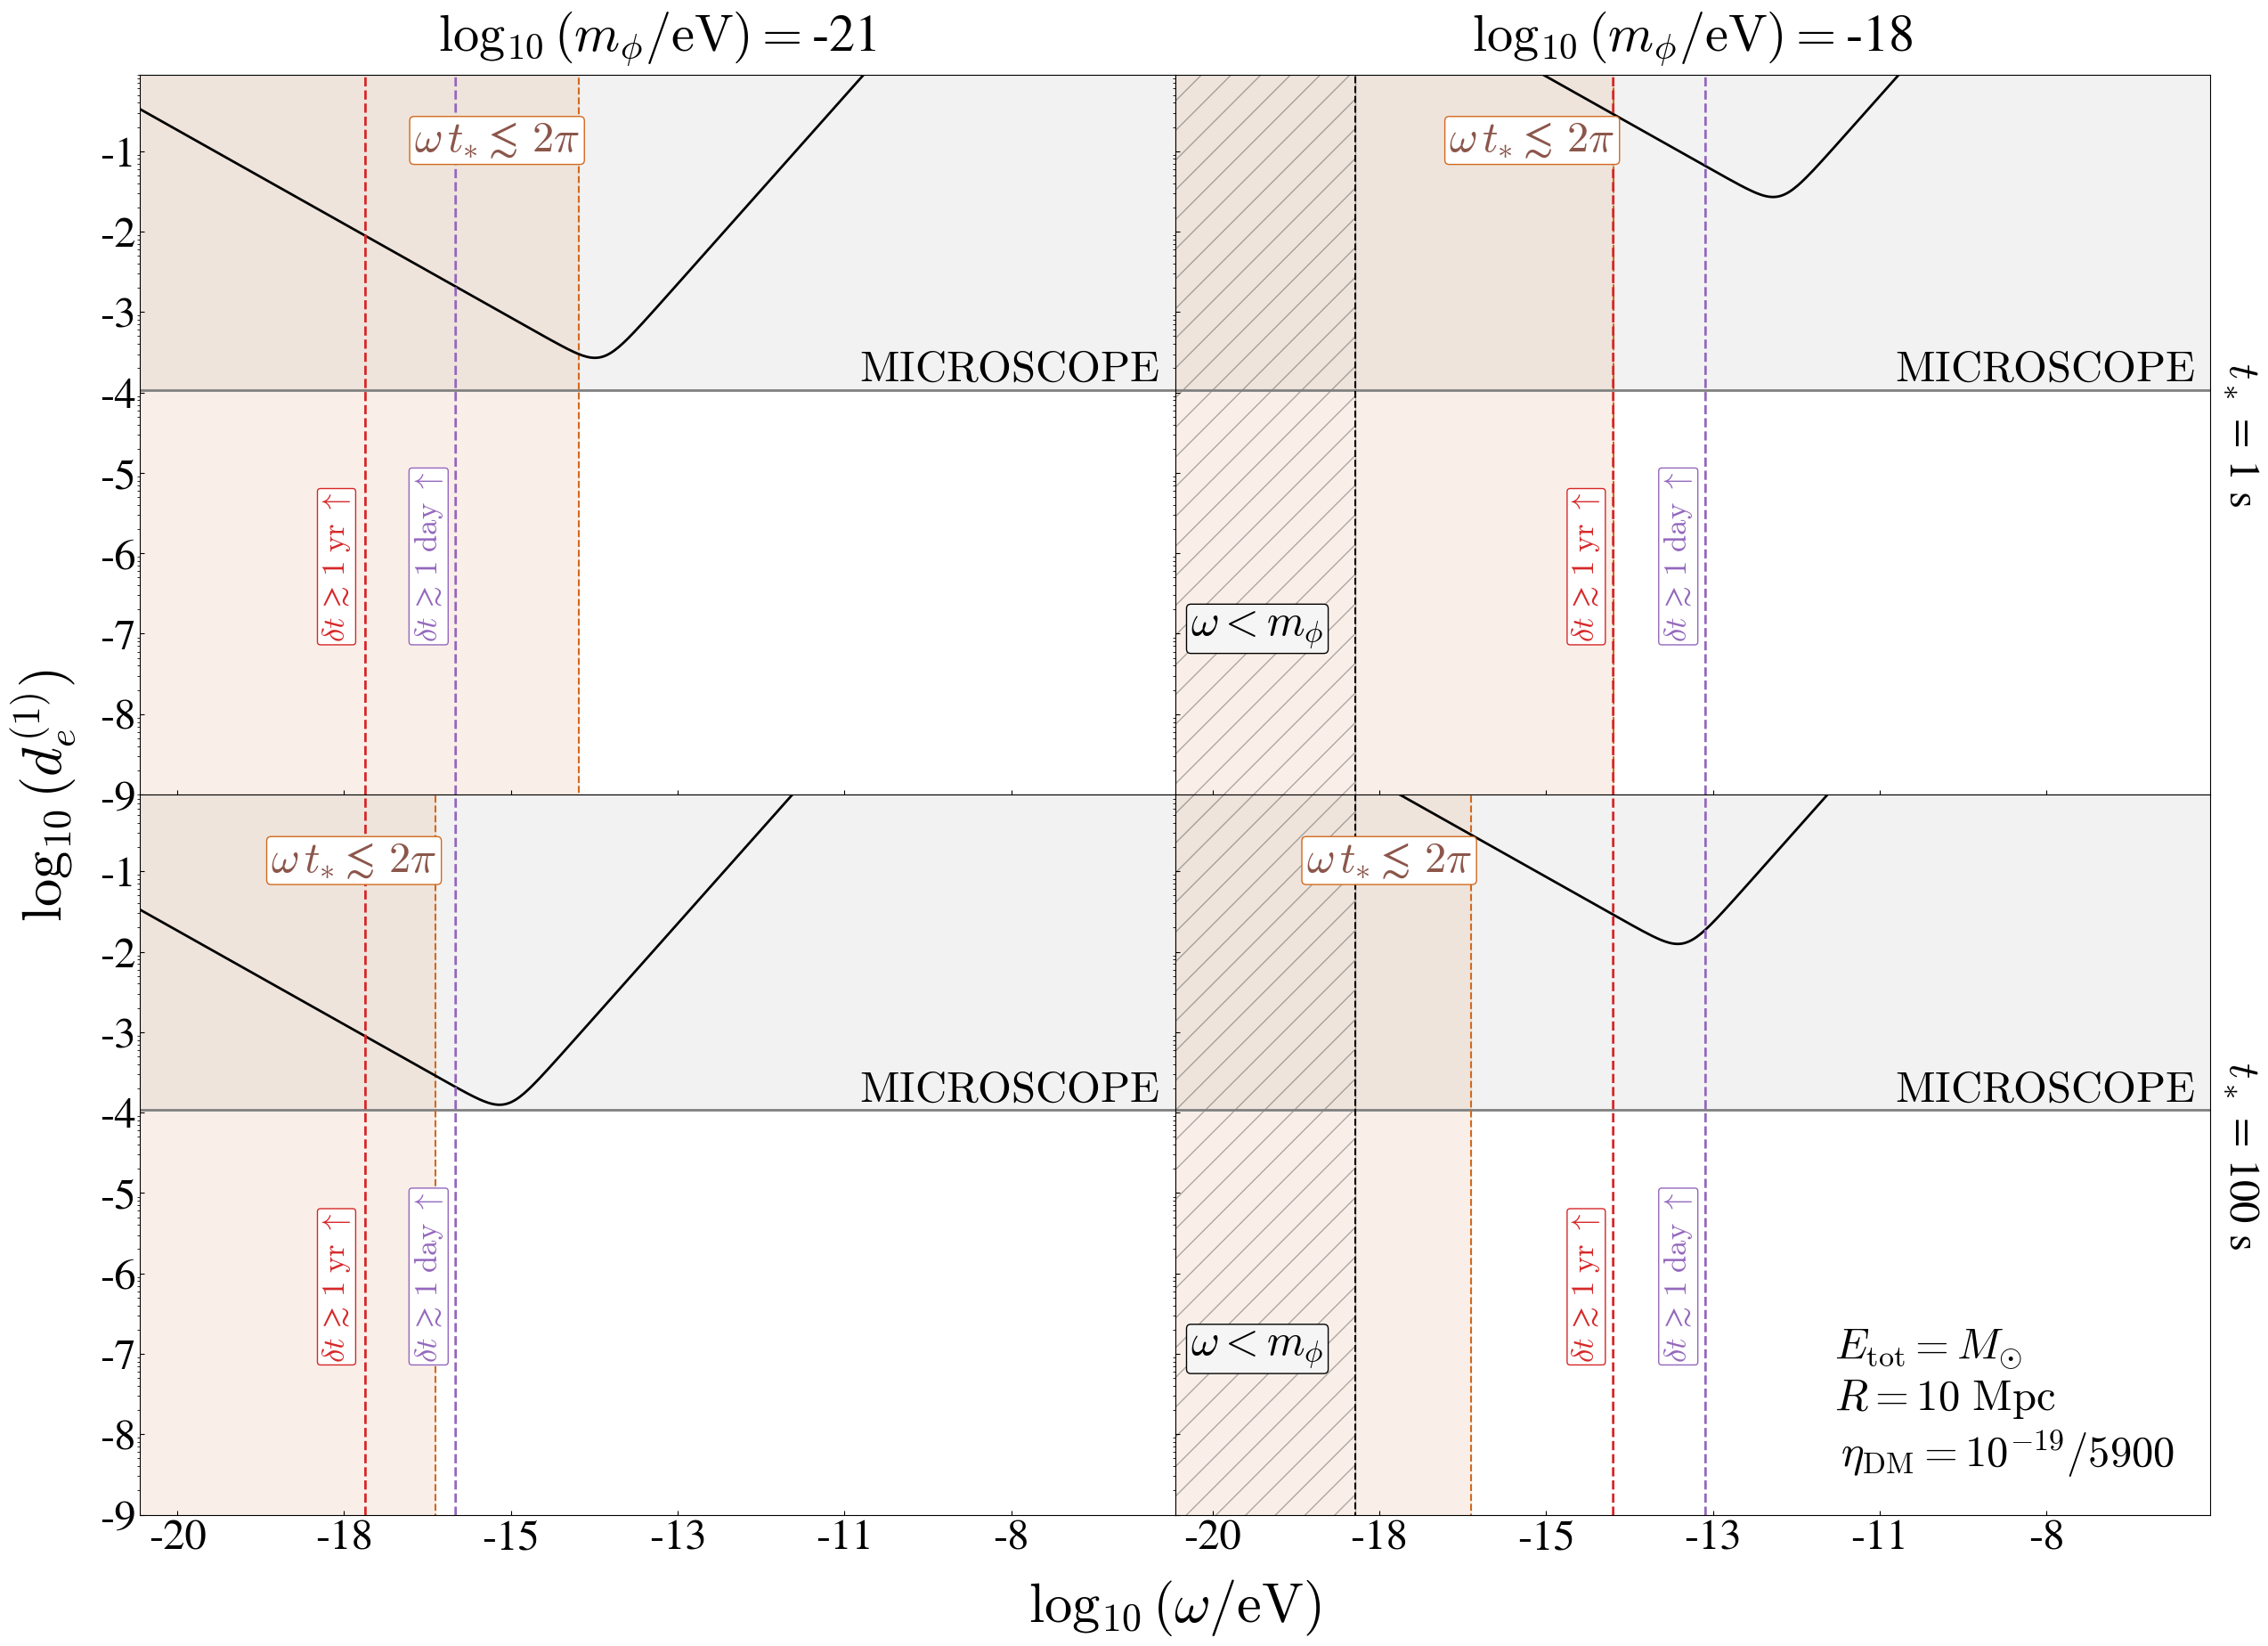

21722181559107.645 5.598066991879363e+27
21722181468452.152 5.598066991879363e+27
21722181559107.645 5.598066991879363e+27
21722181468452.152 5.598066991879363e+27


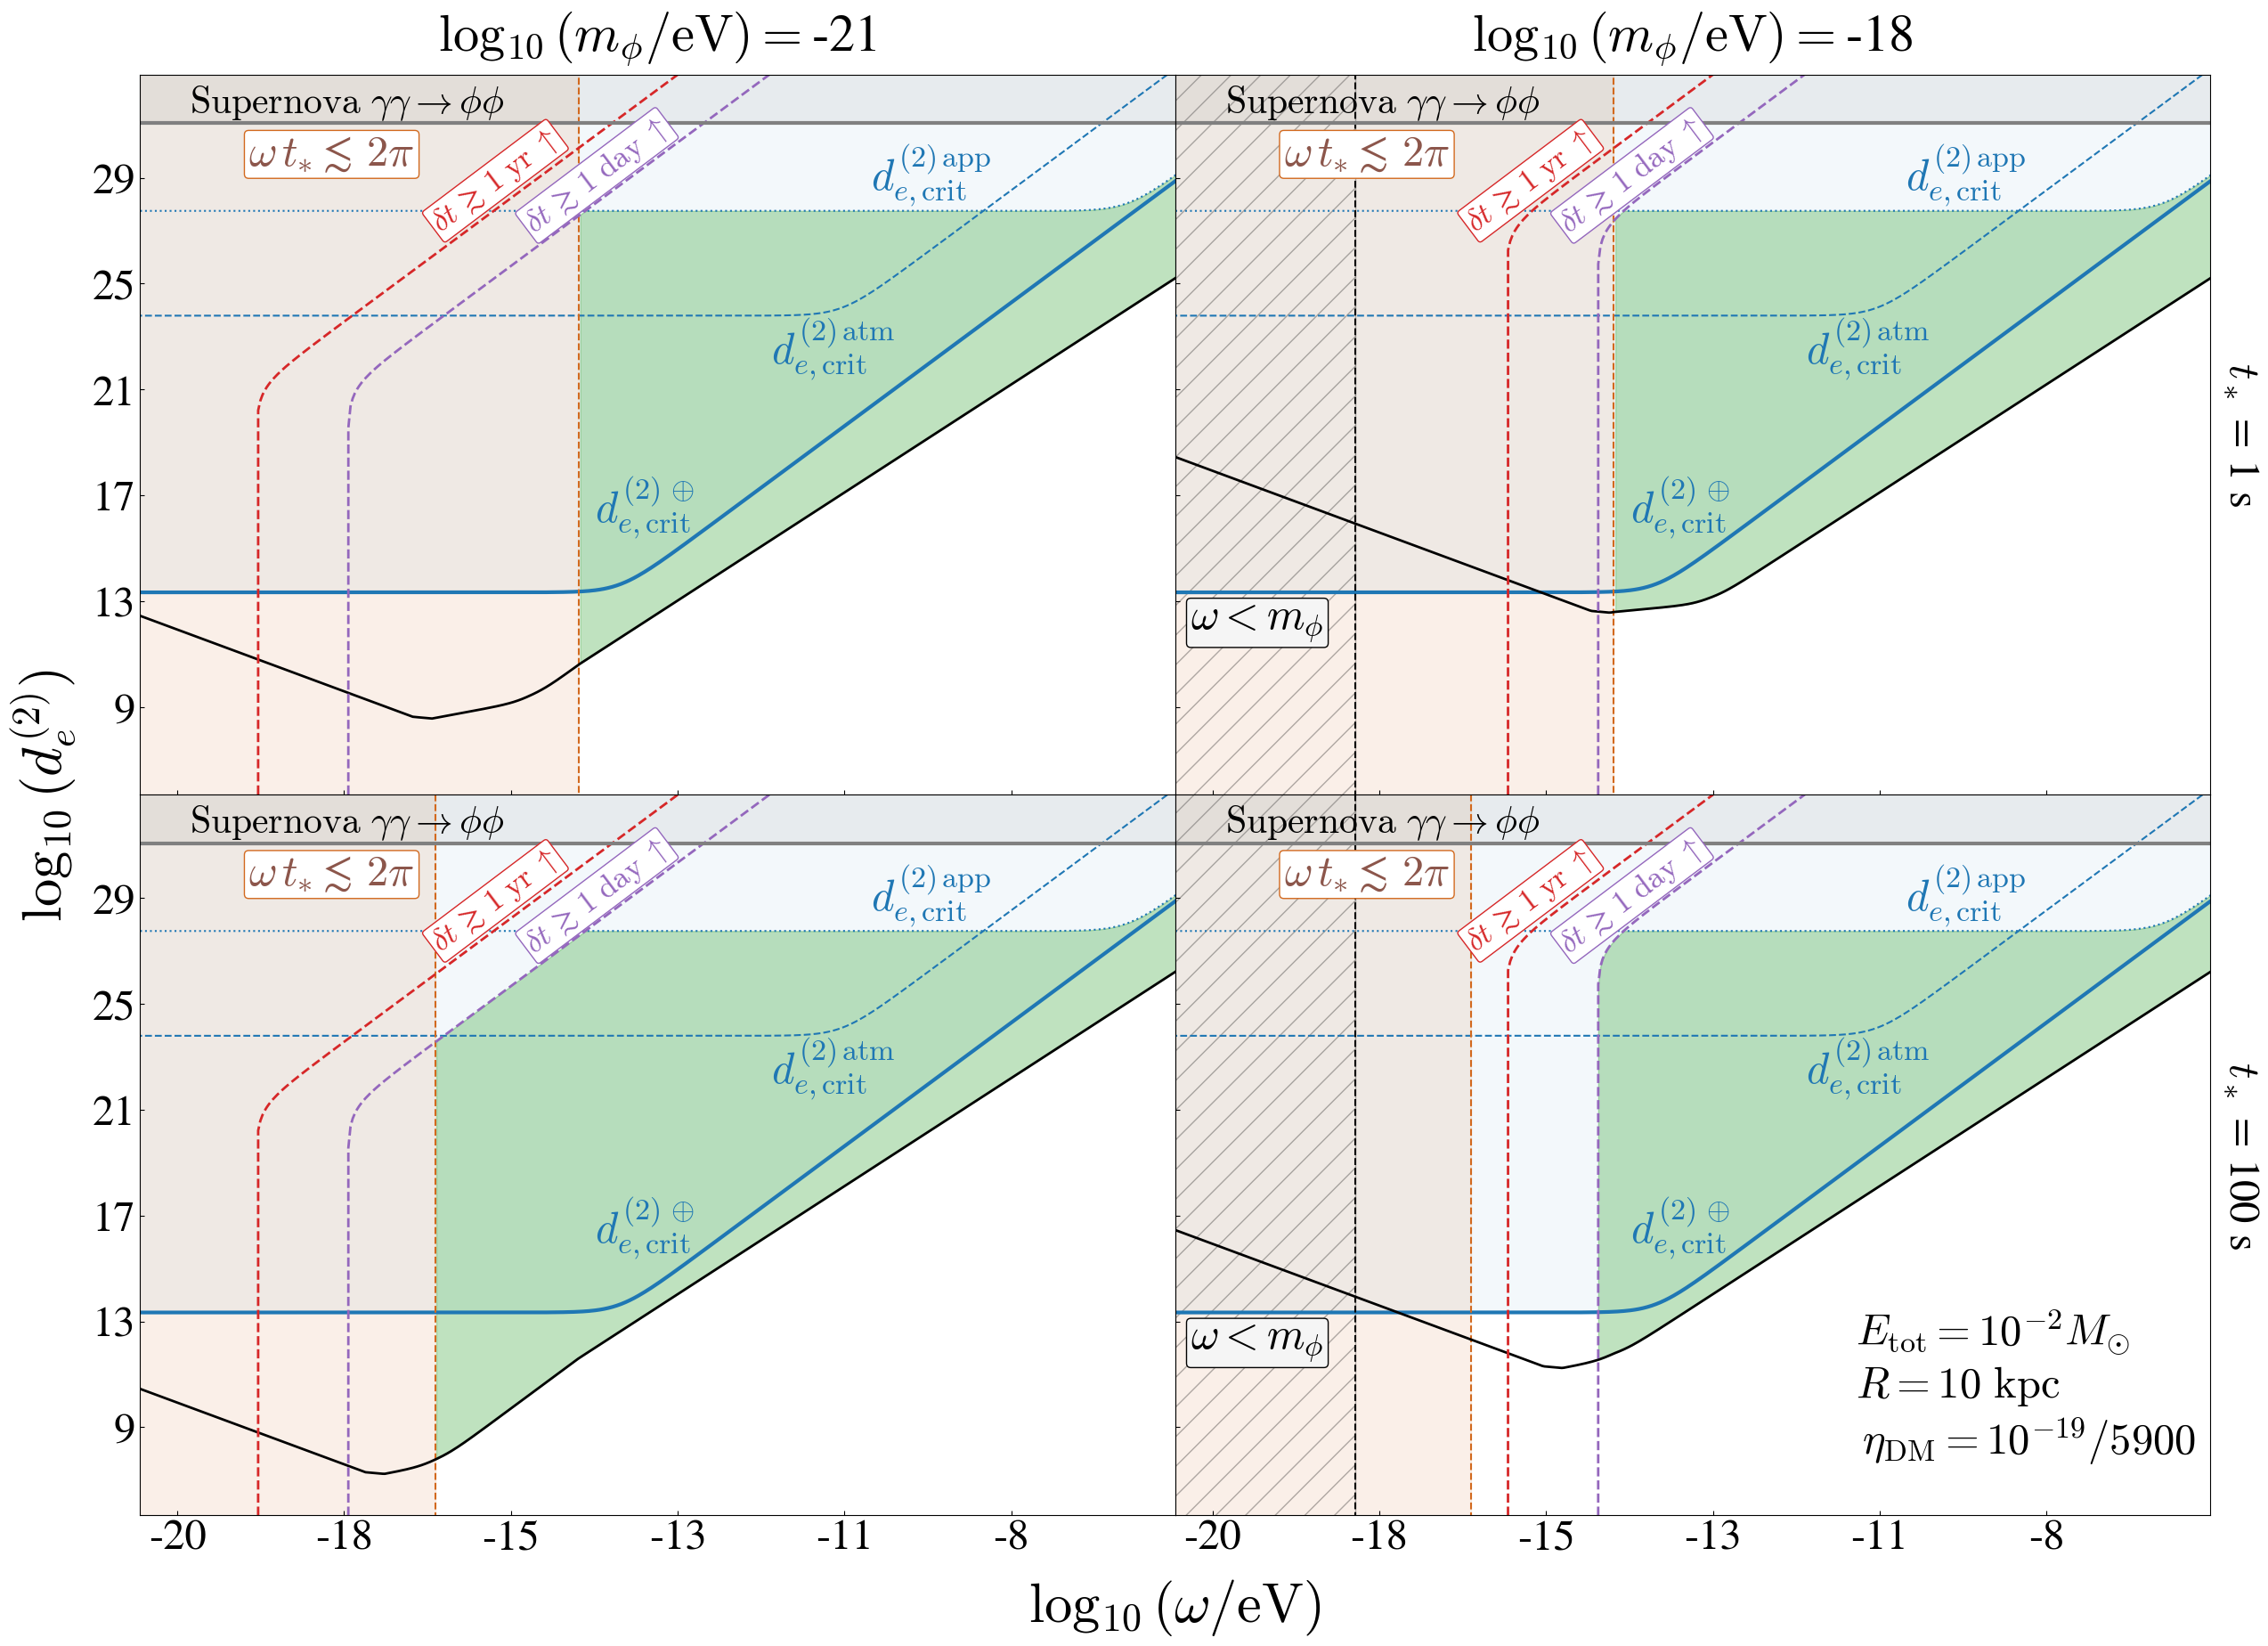

21722181559107.645 5.598066991879363e+27
21722181468452.152 5.598066991879363e+27
21722181559107.645 5.598066991879363e+27
21722181468452.152 5.598066991879363e+27


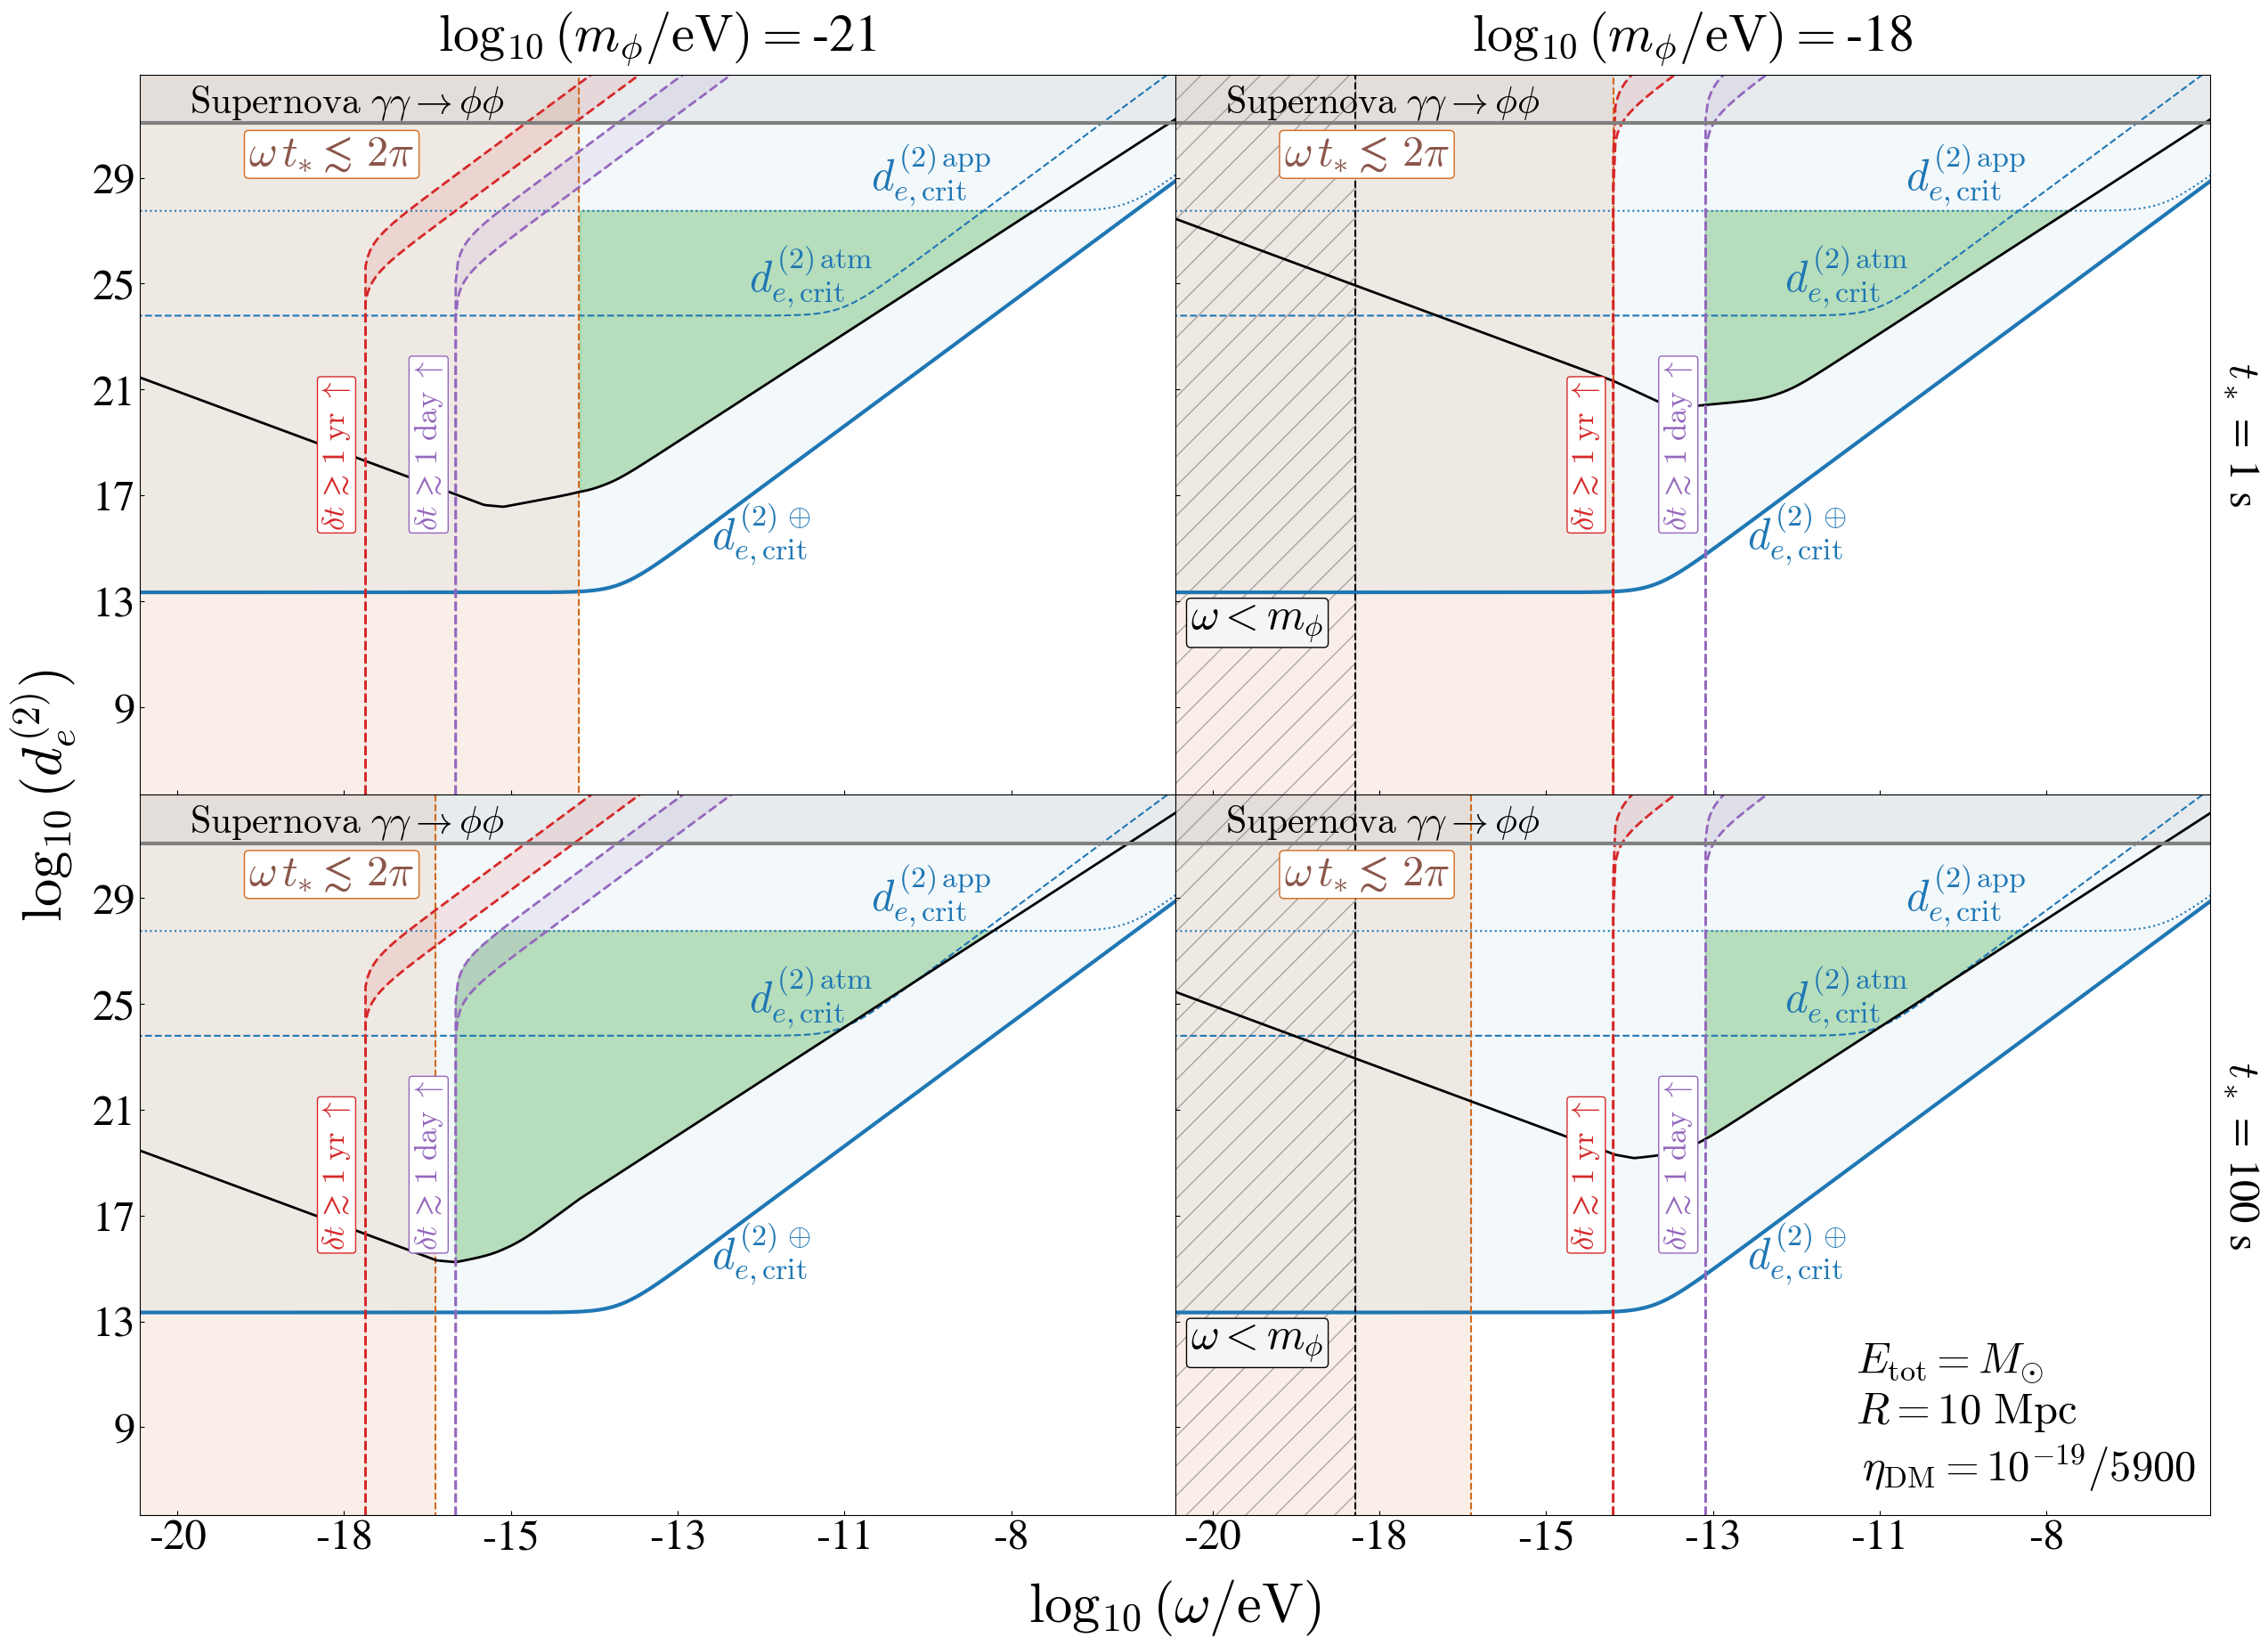

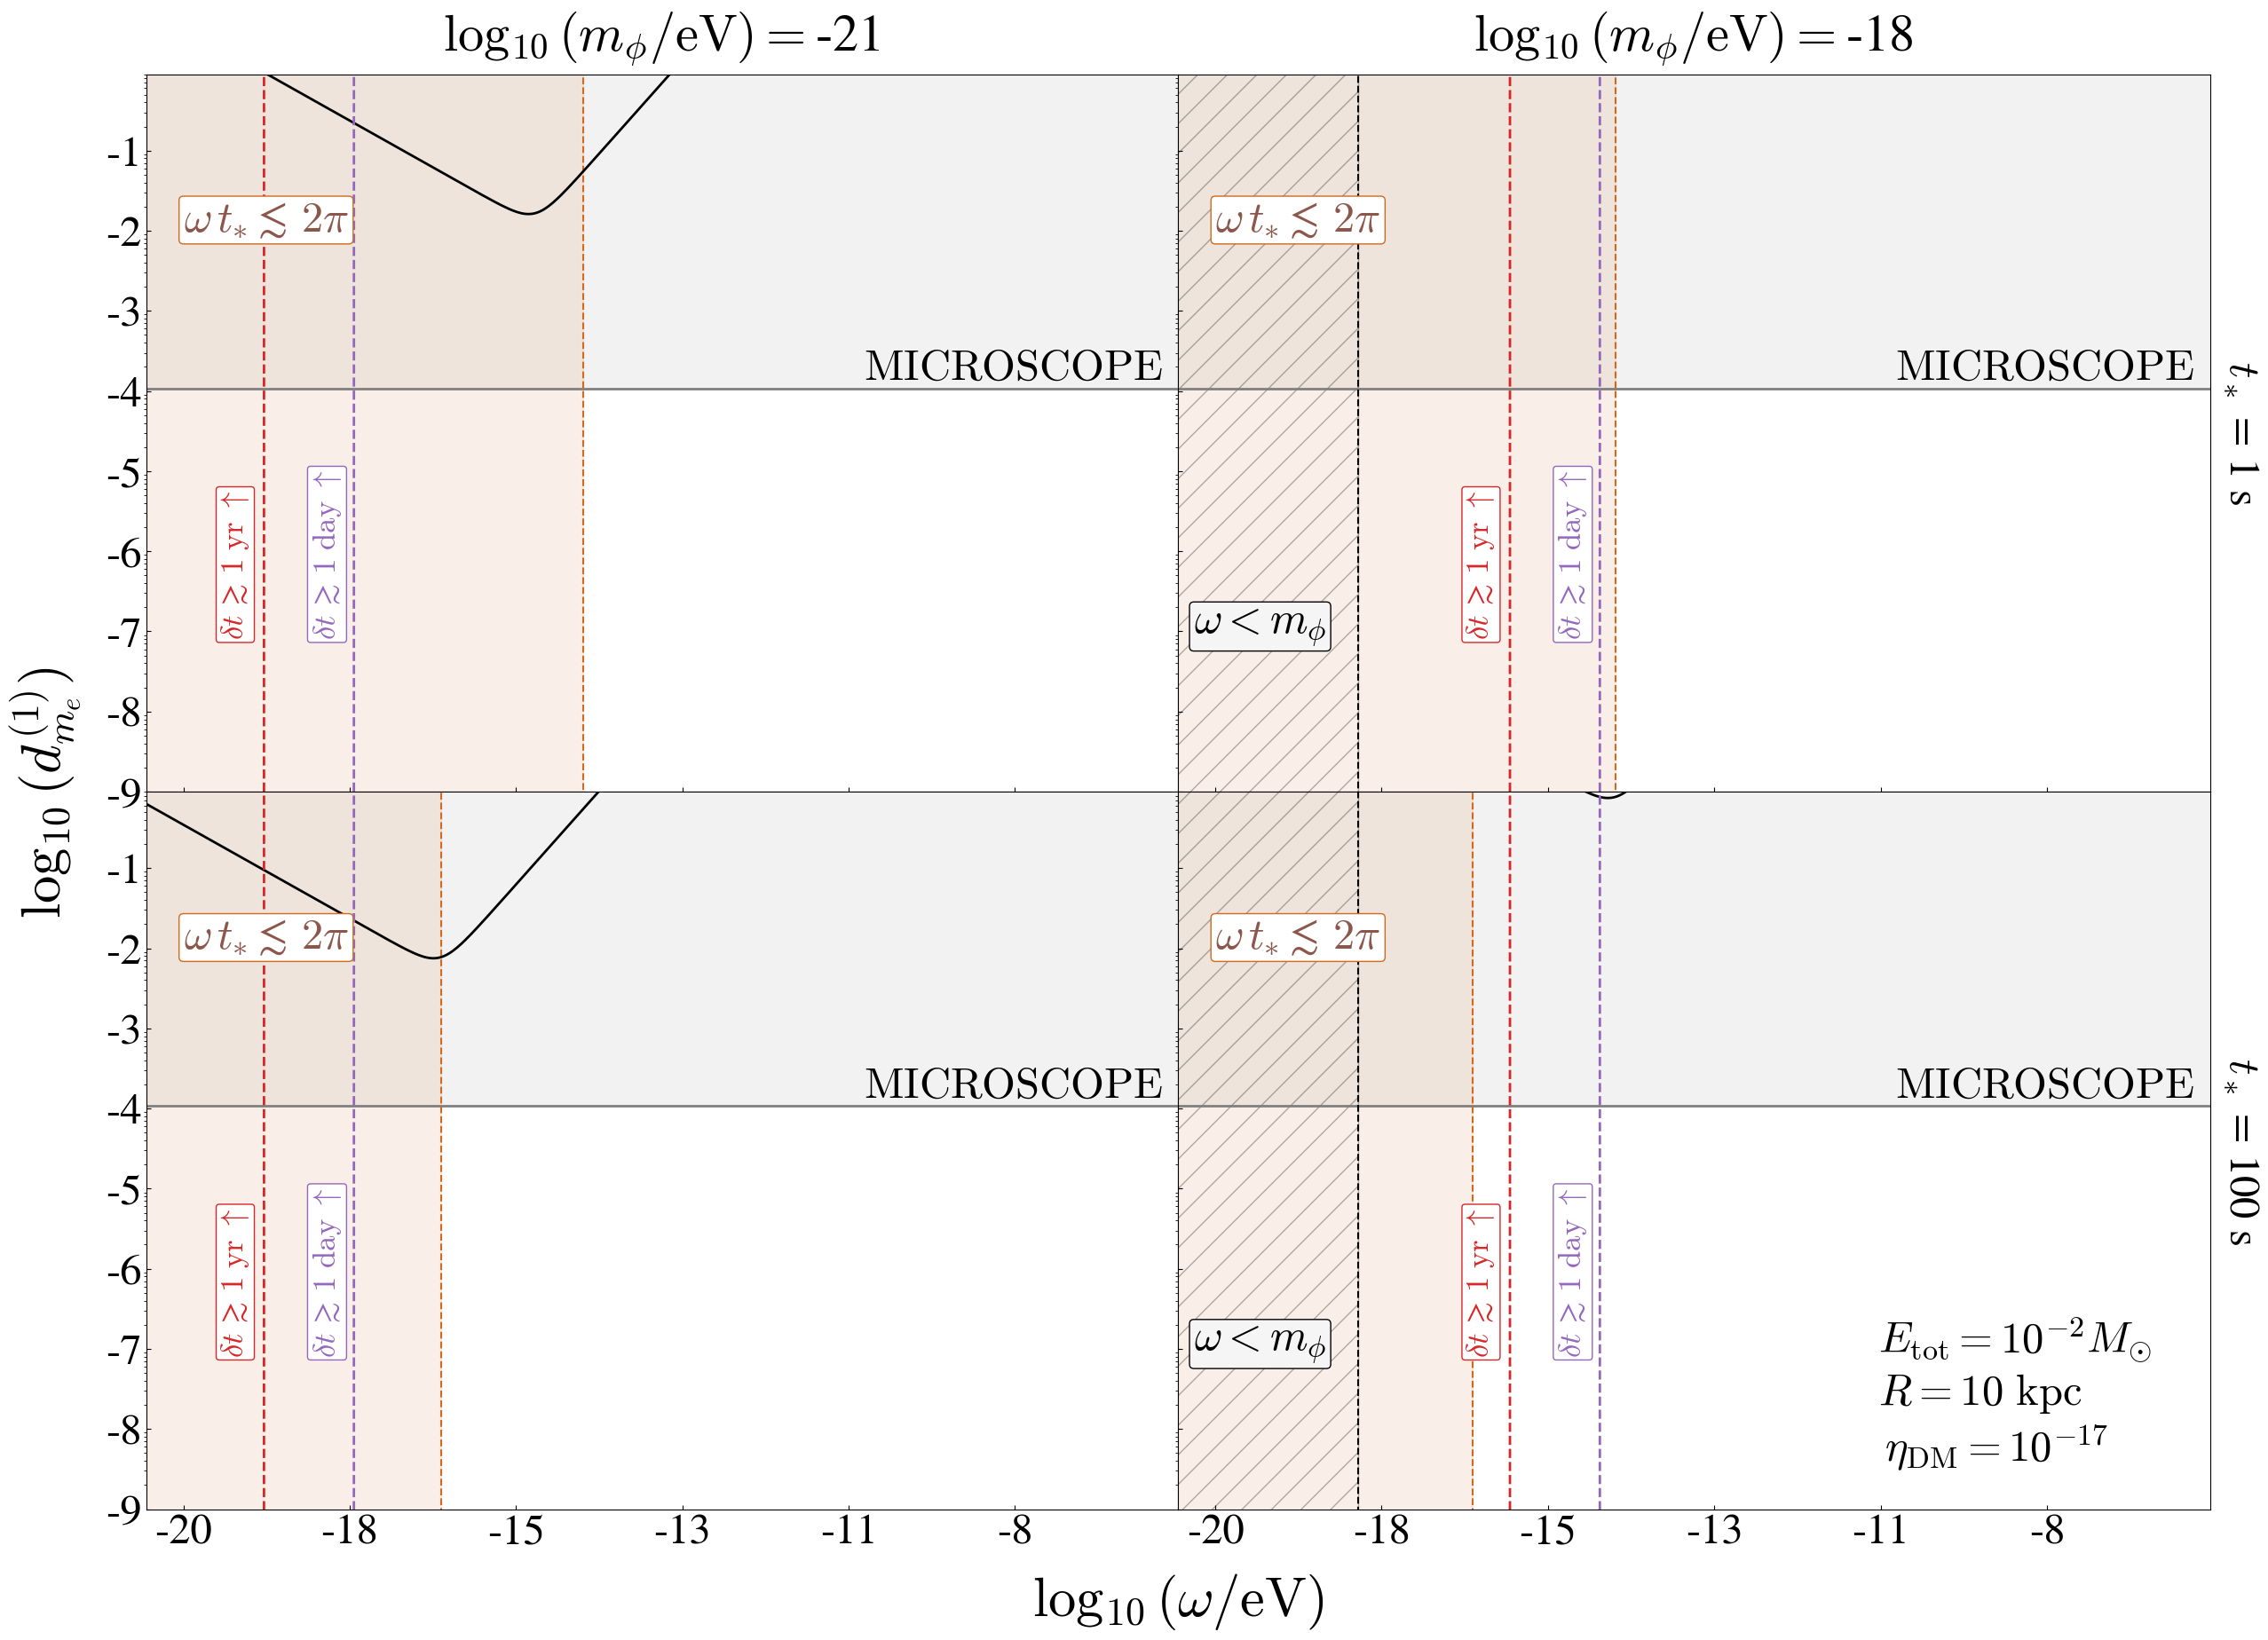

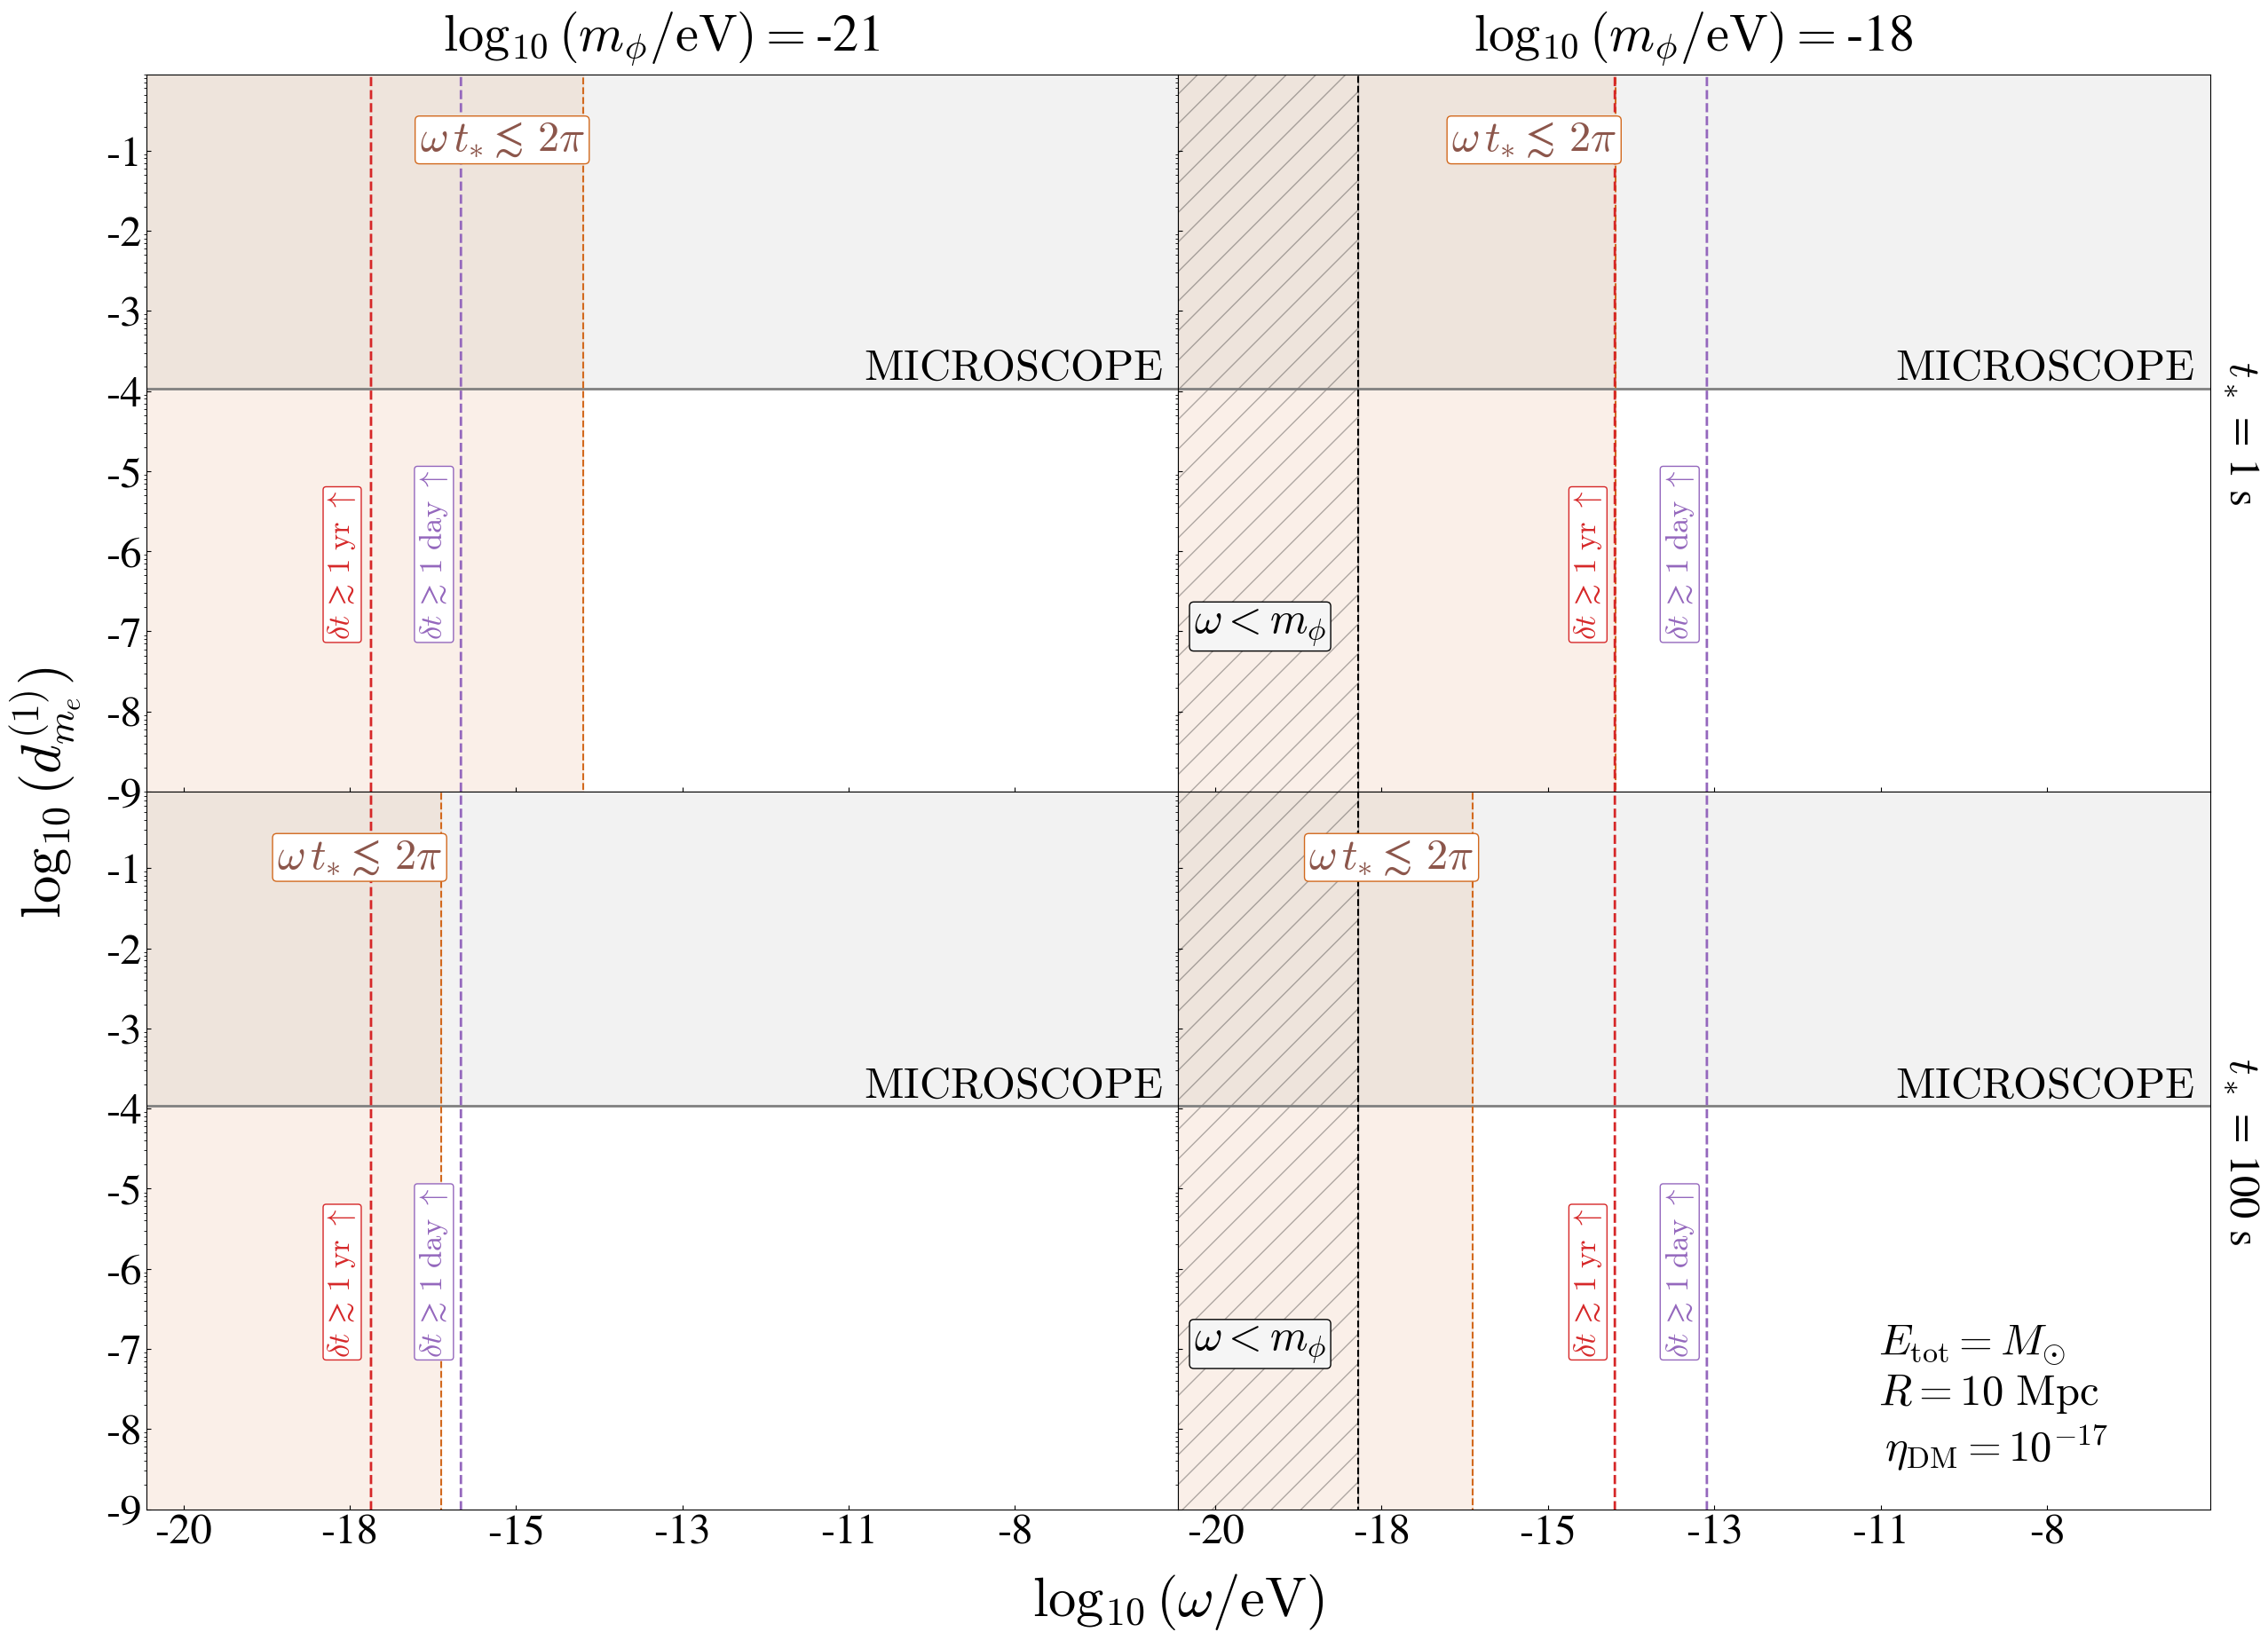

171967270676268.84 4.431803035237829e+28
171967269958579.5 4.431803035237829e+28
171967270676268.84 4.431803035237829e+28
171967269958579.5 4.431803035237829e+28


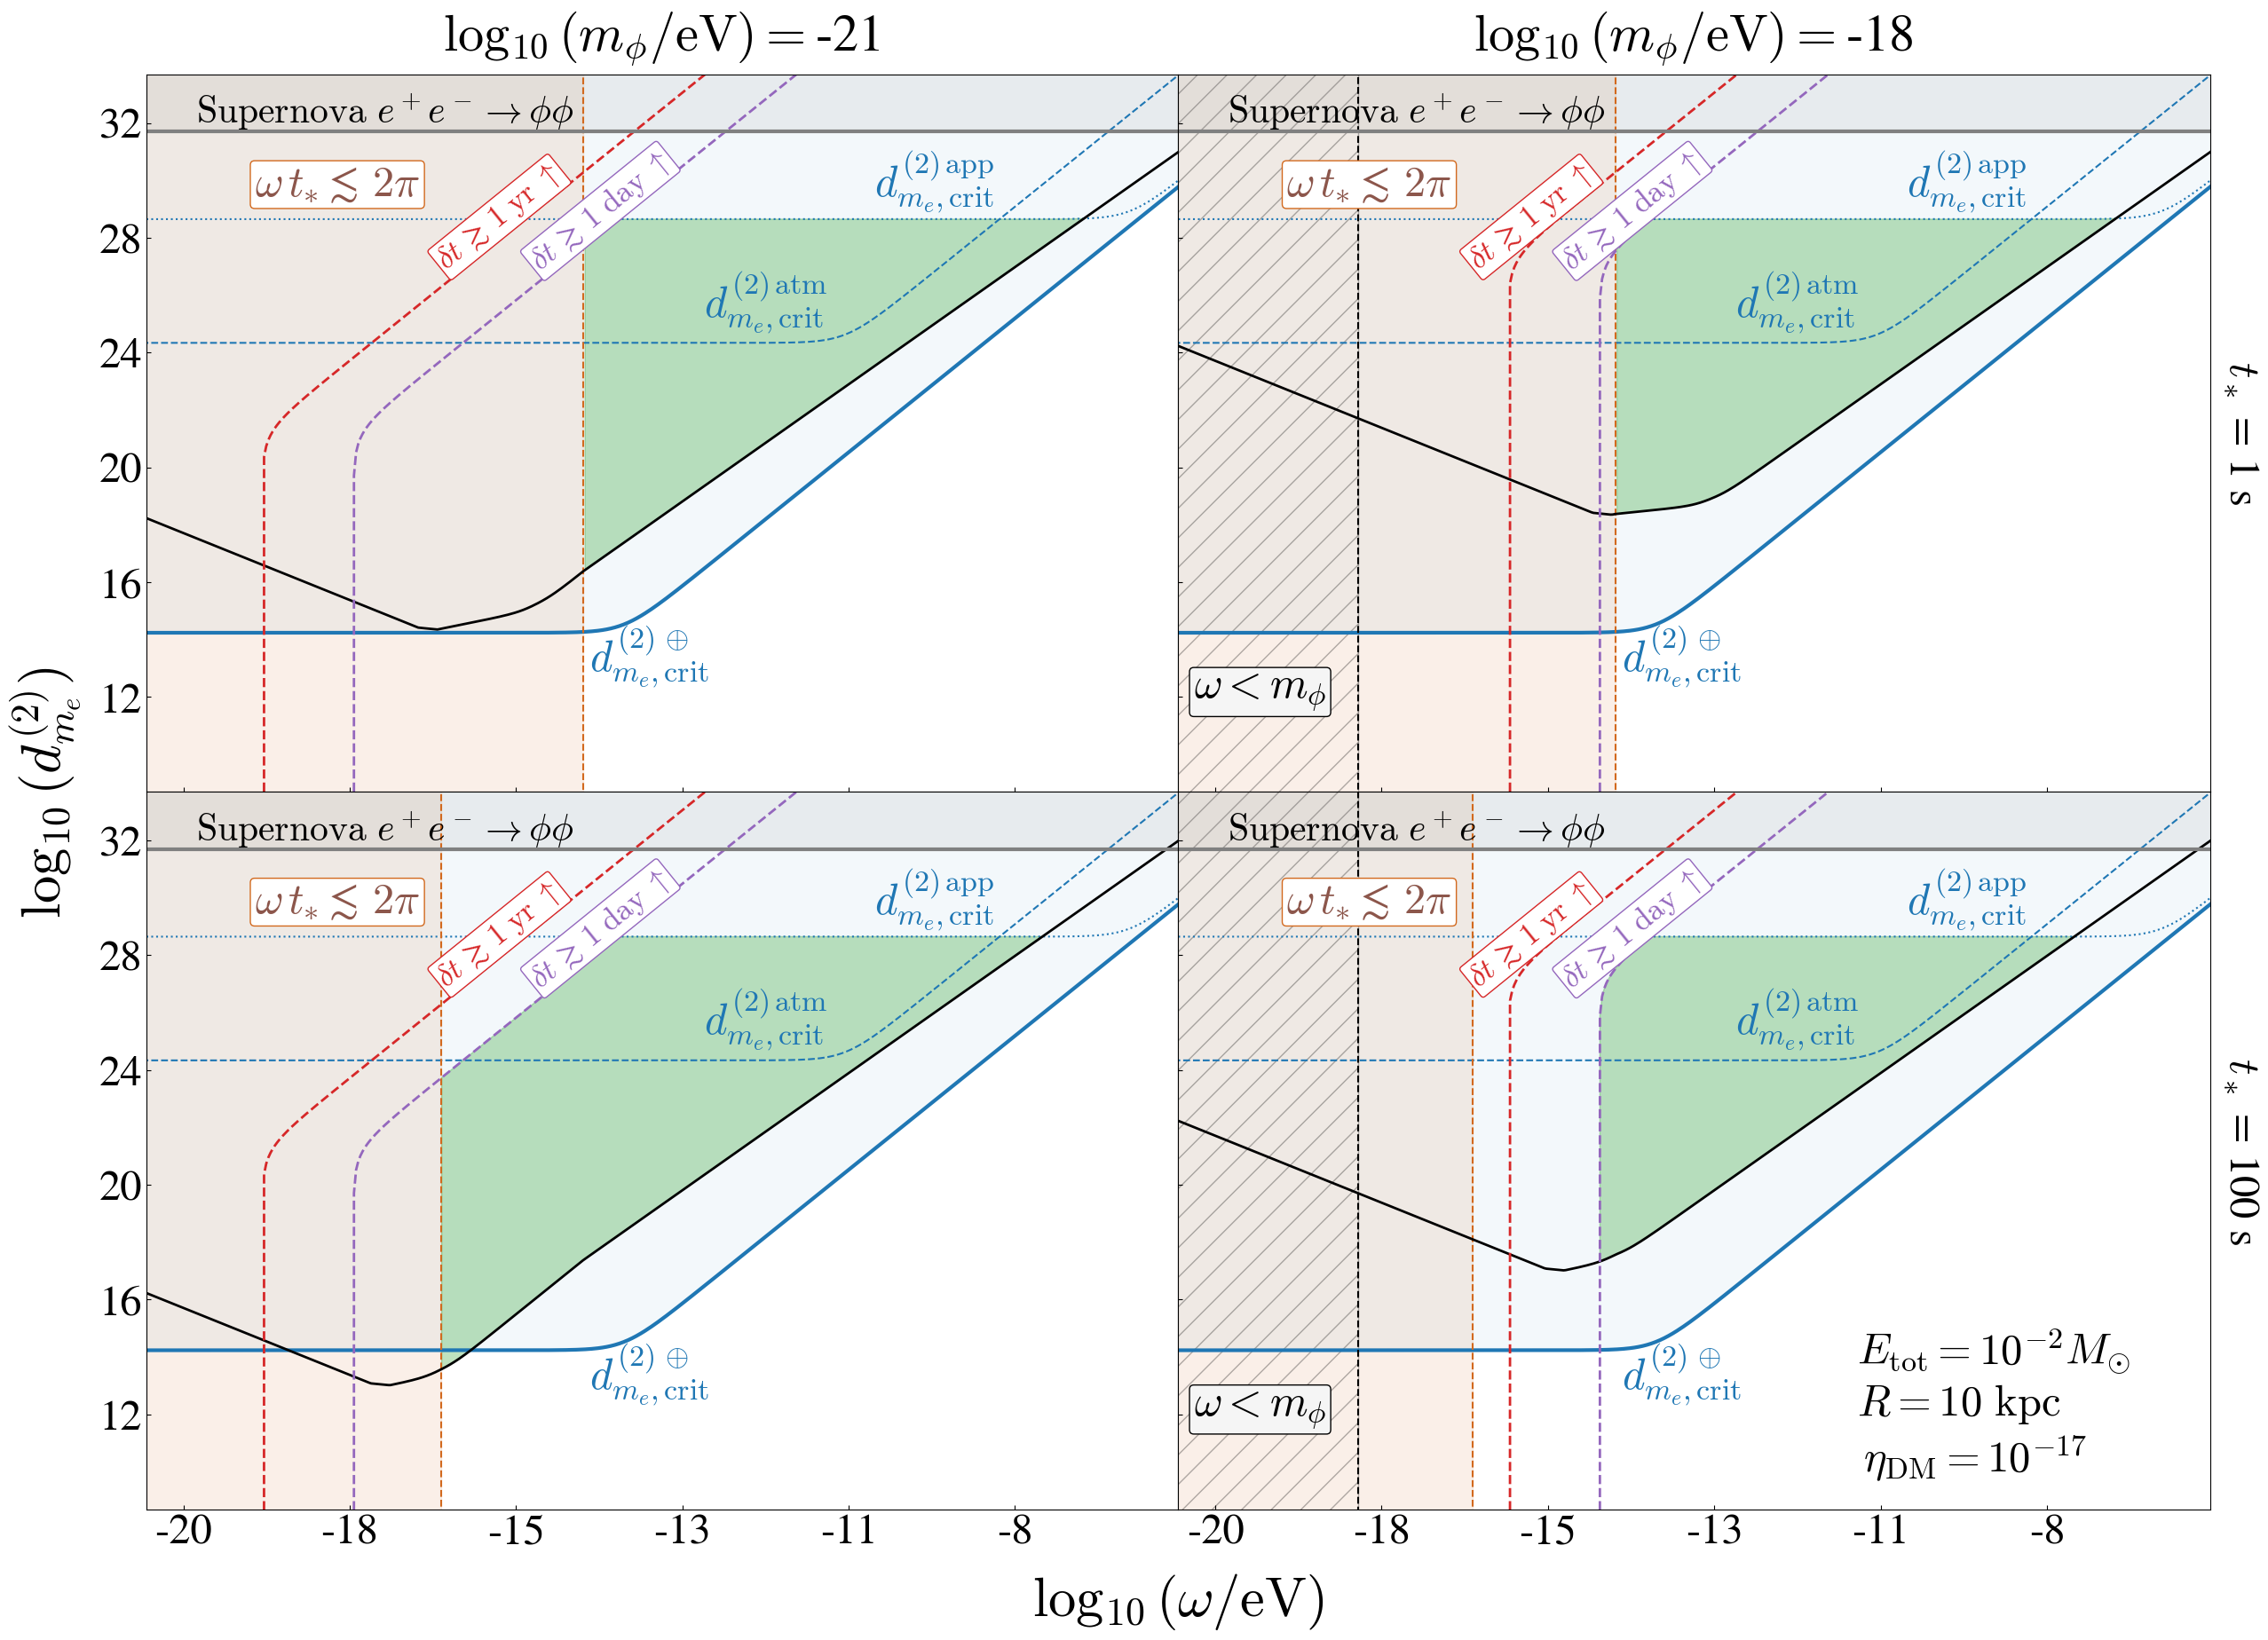

171967270676268.84 4.431803035237829e+28
171967269958579.5 4.431803035237829e+28
171967270676268.84 4.431803035237829e+28
171967269958579.5 4.431803035237829e+28


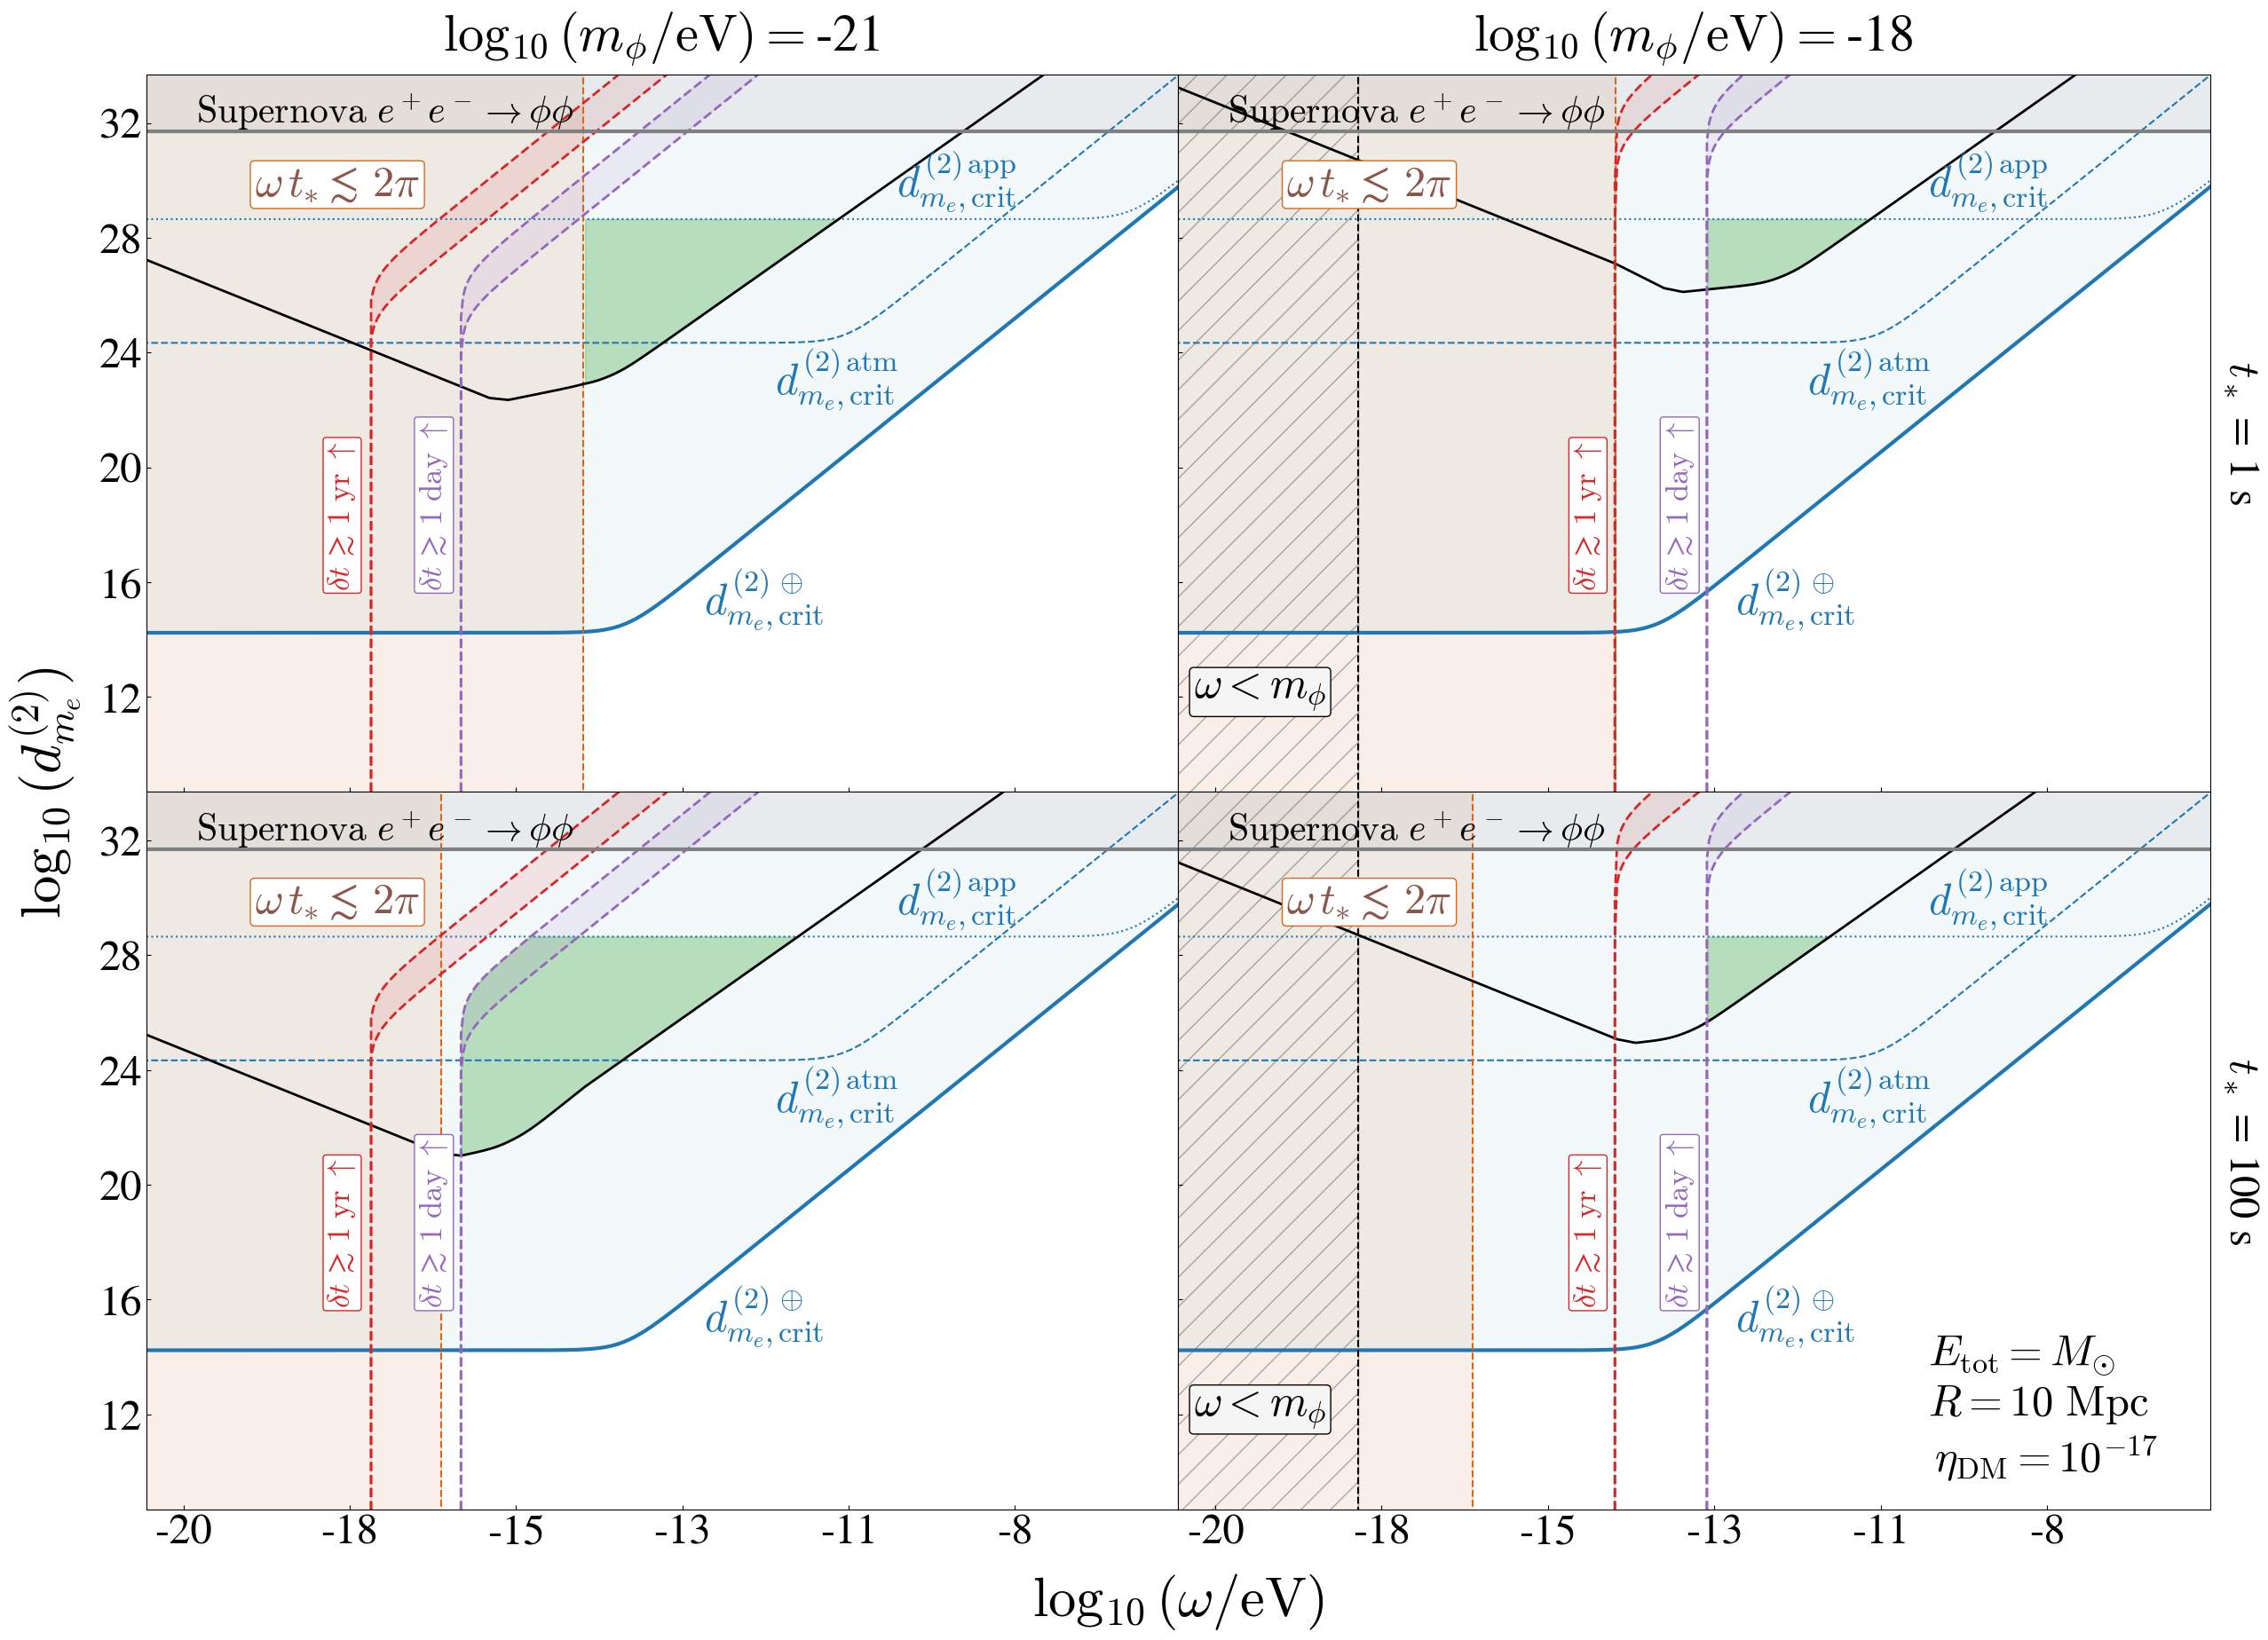

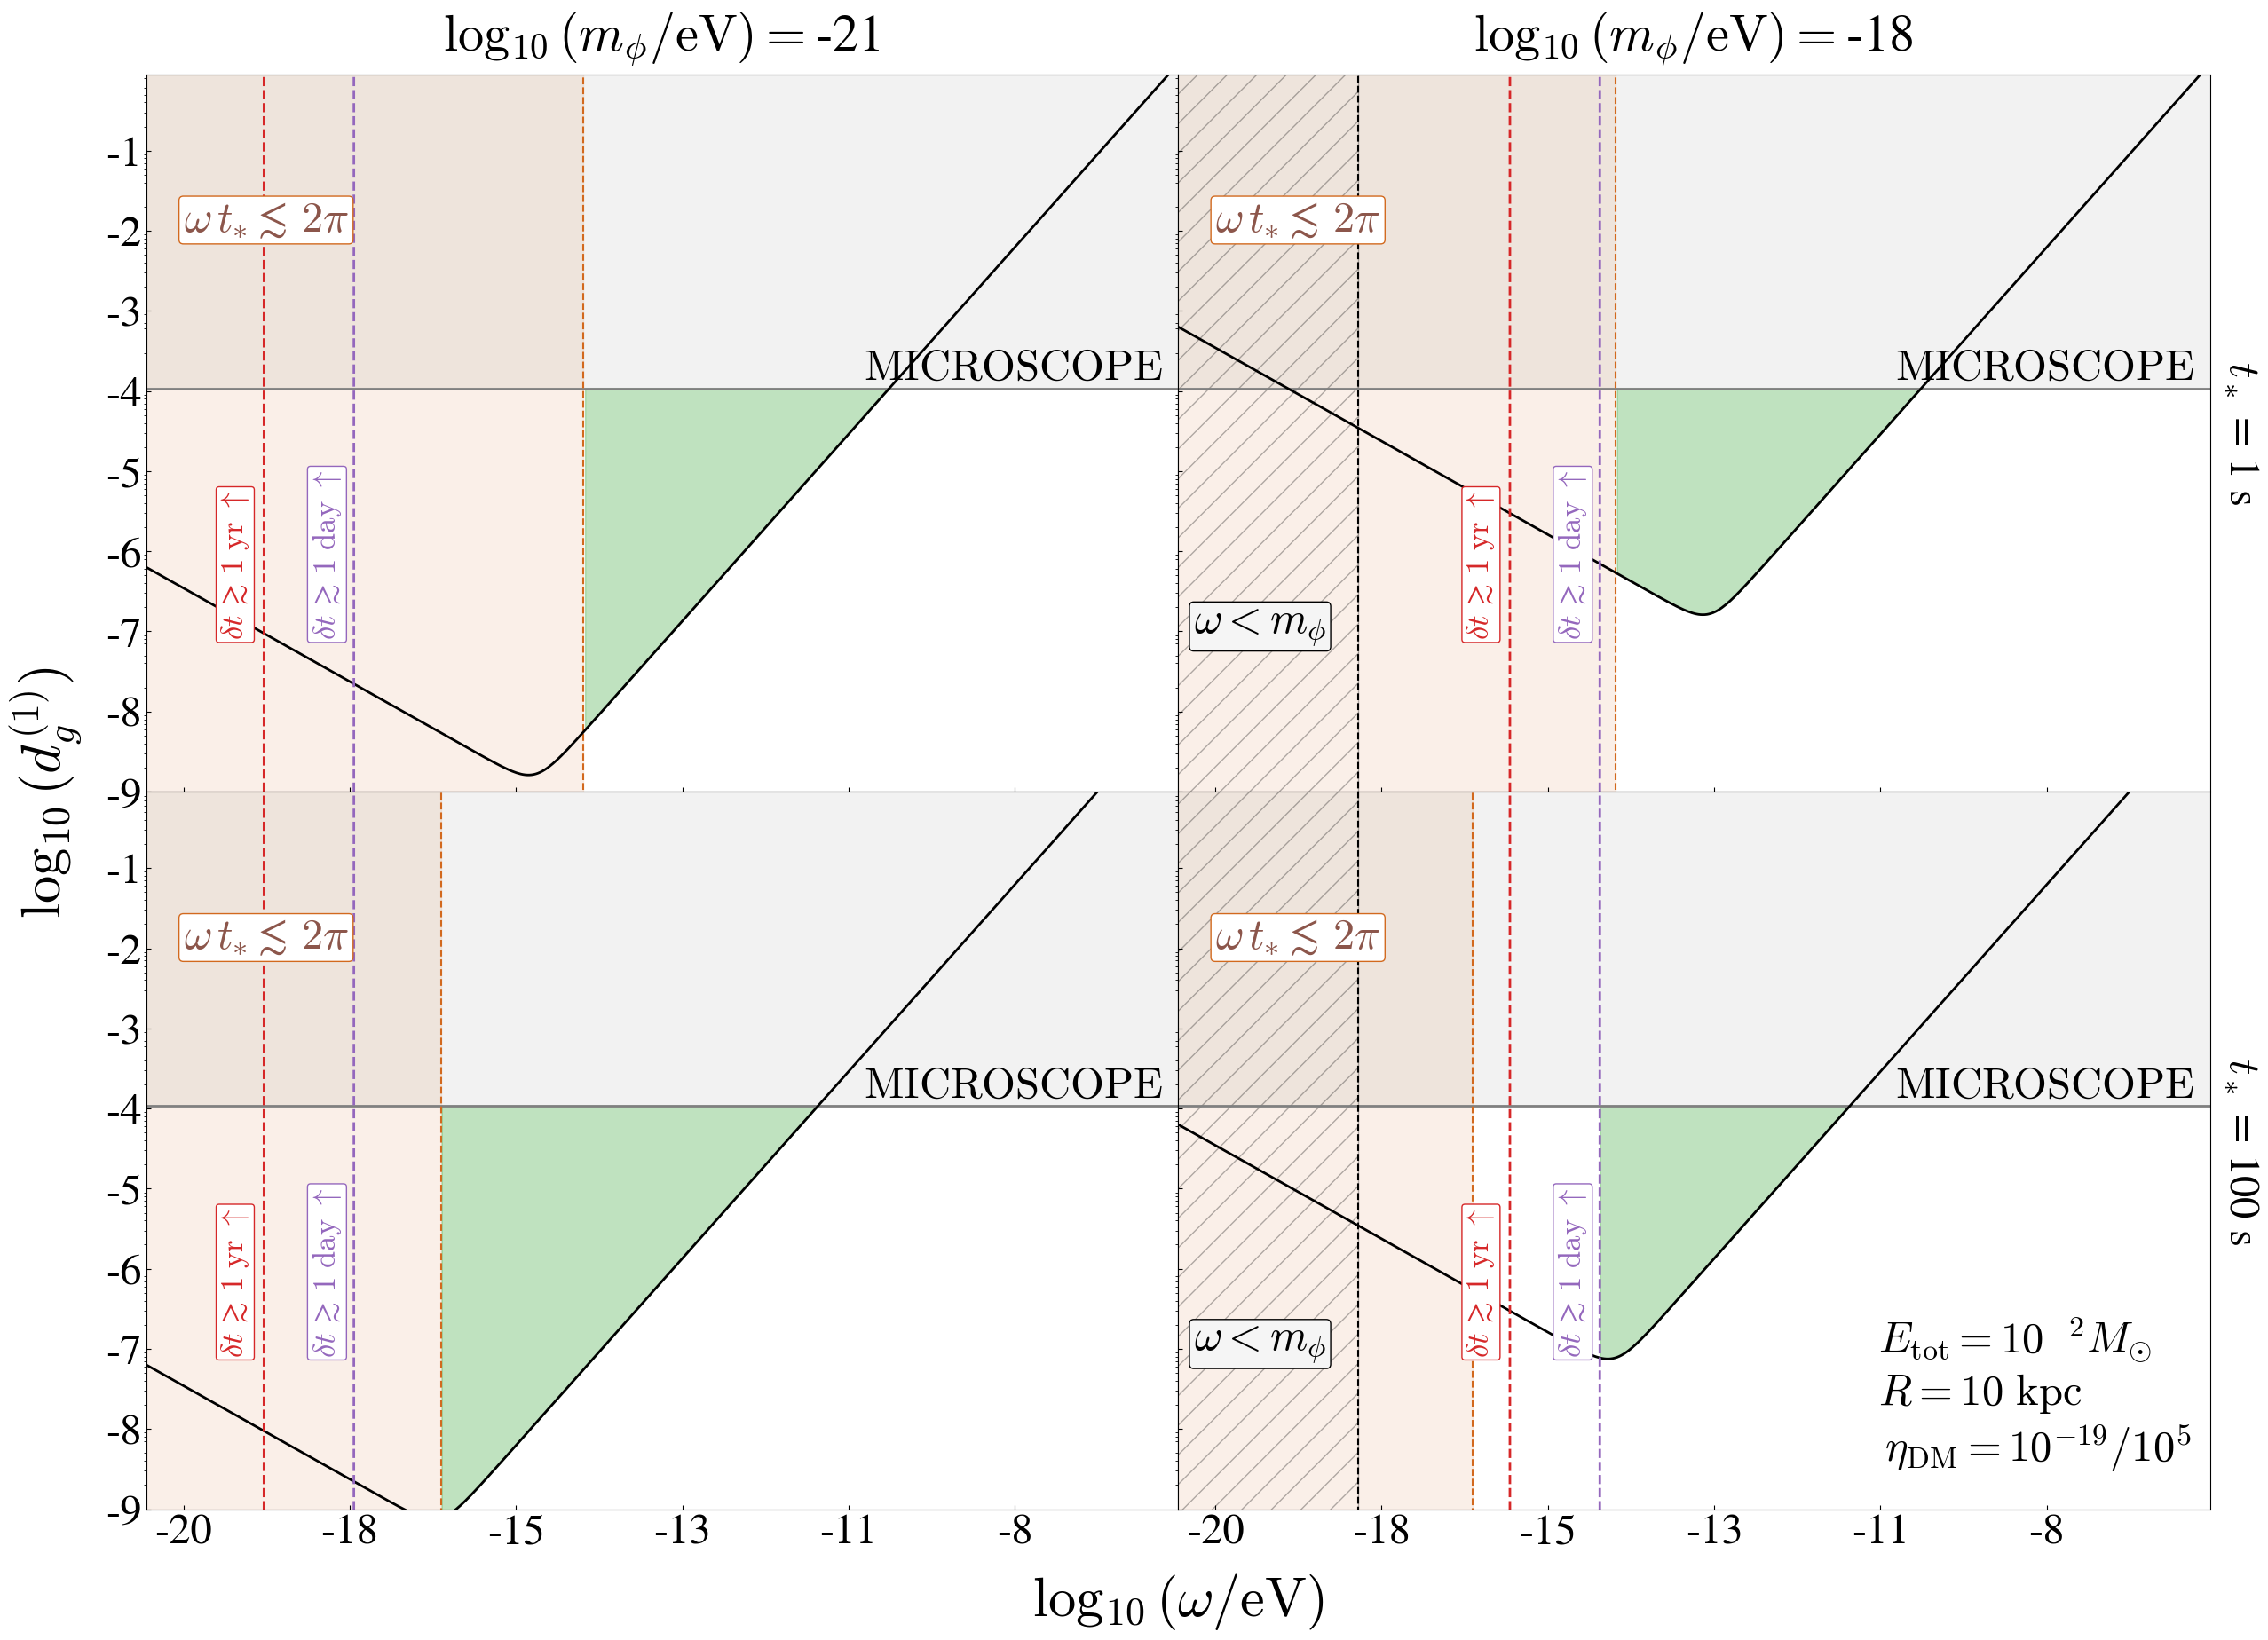

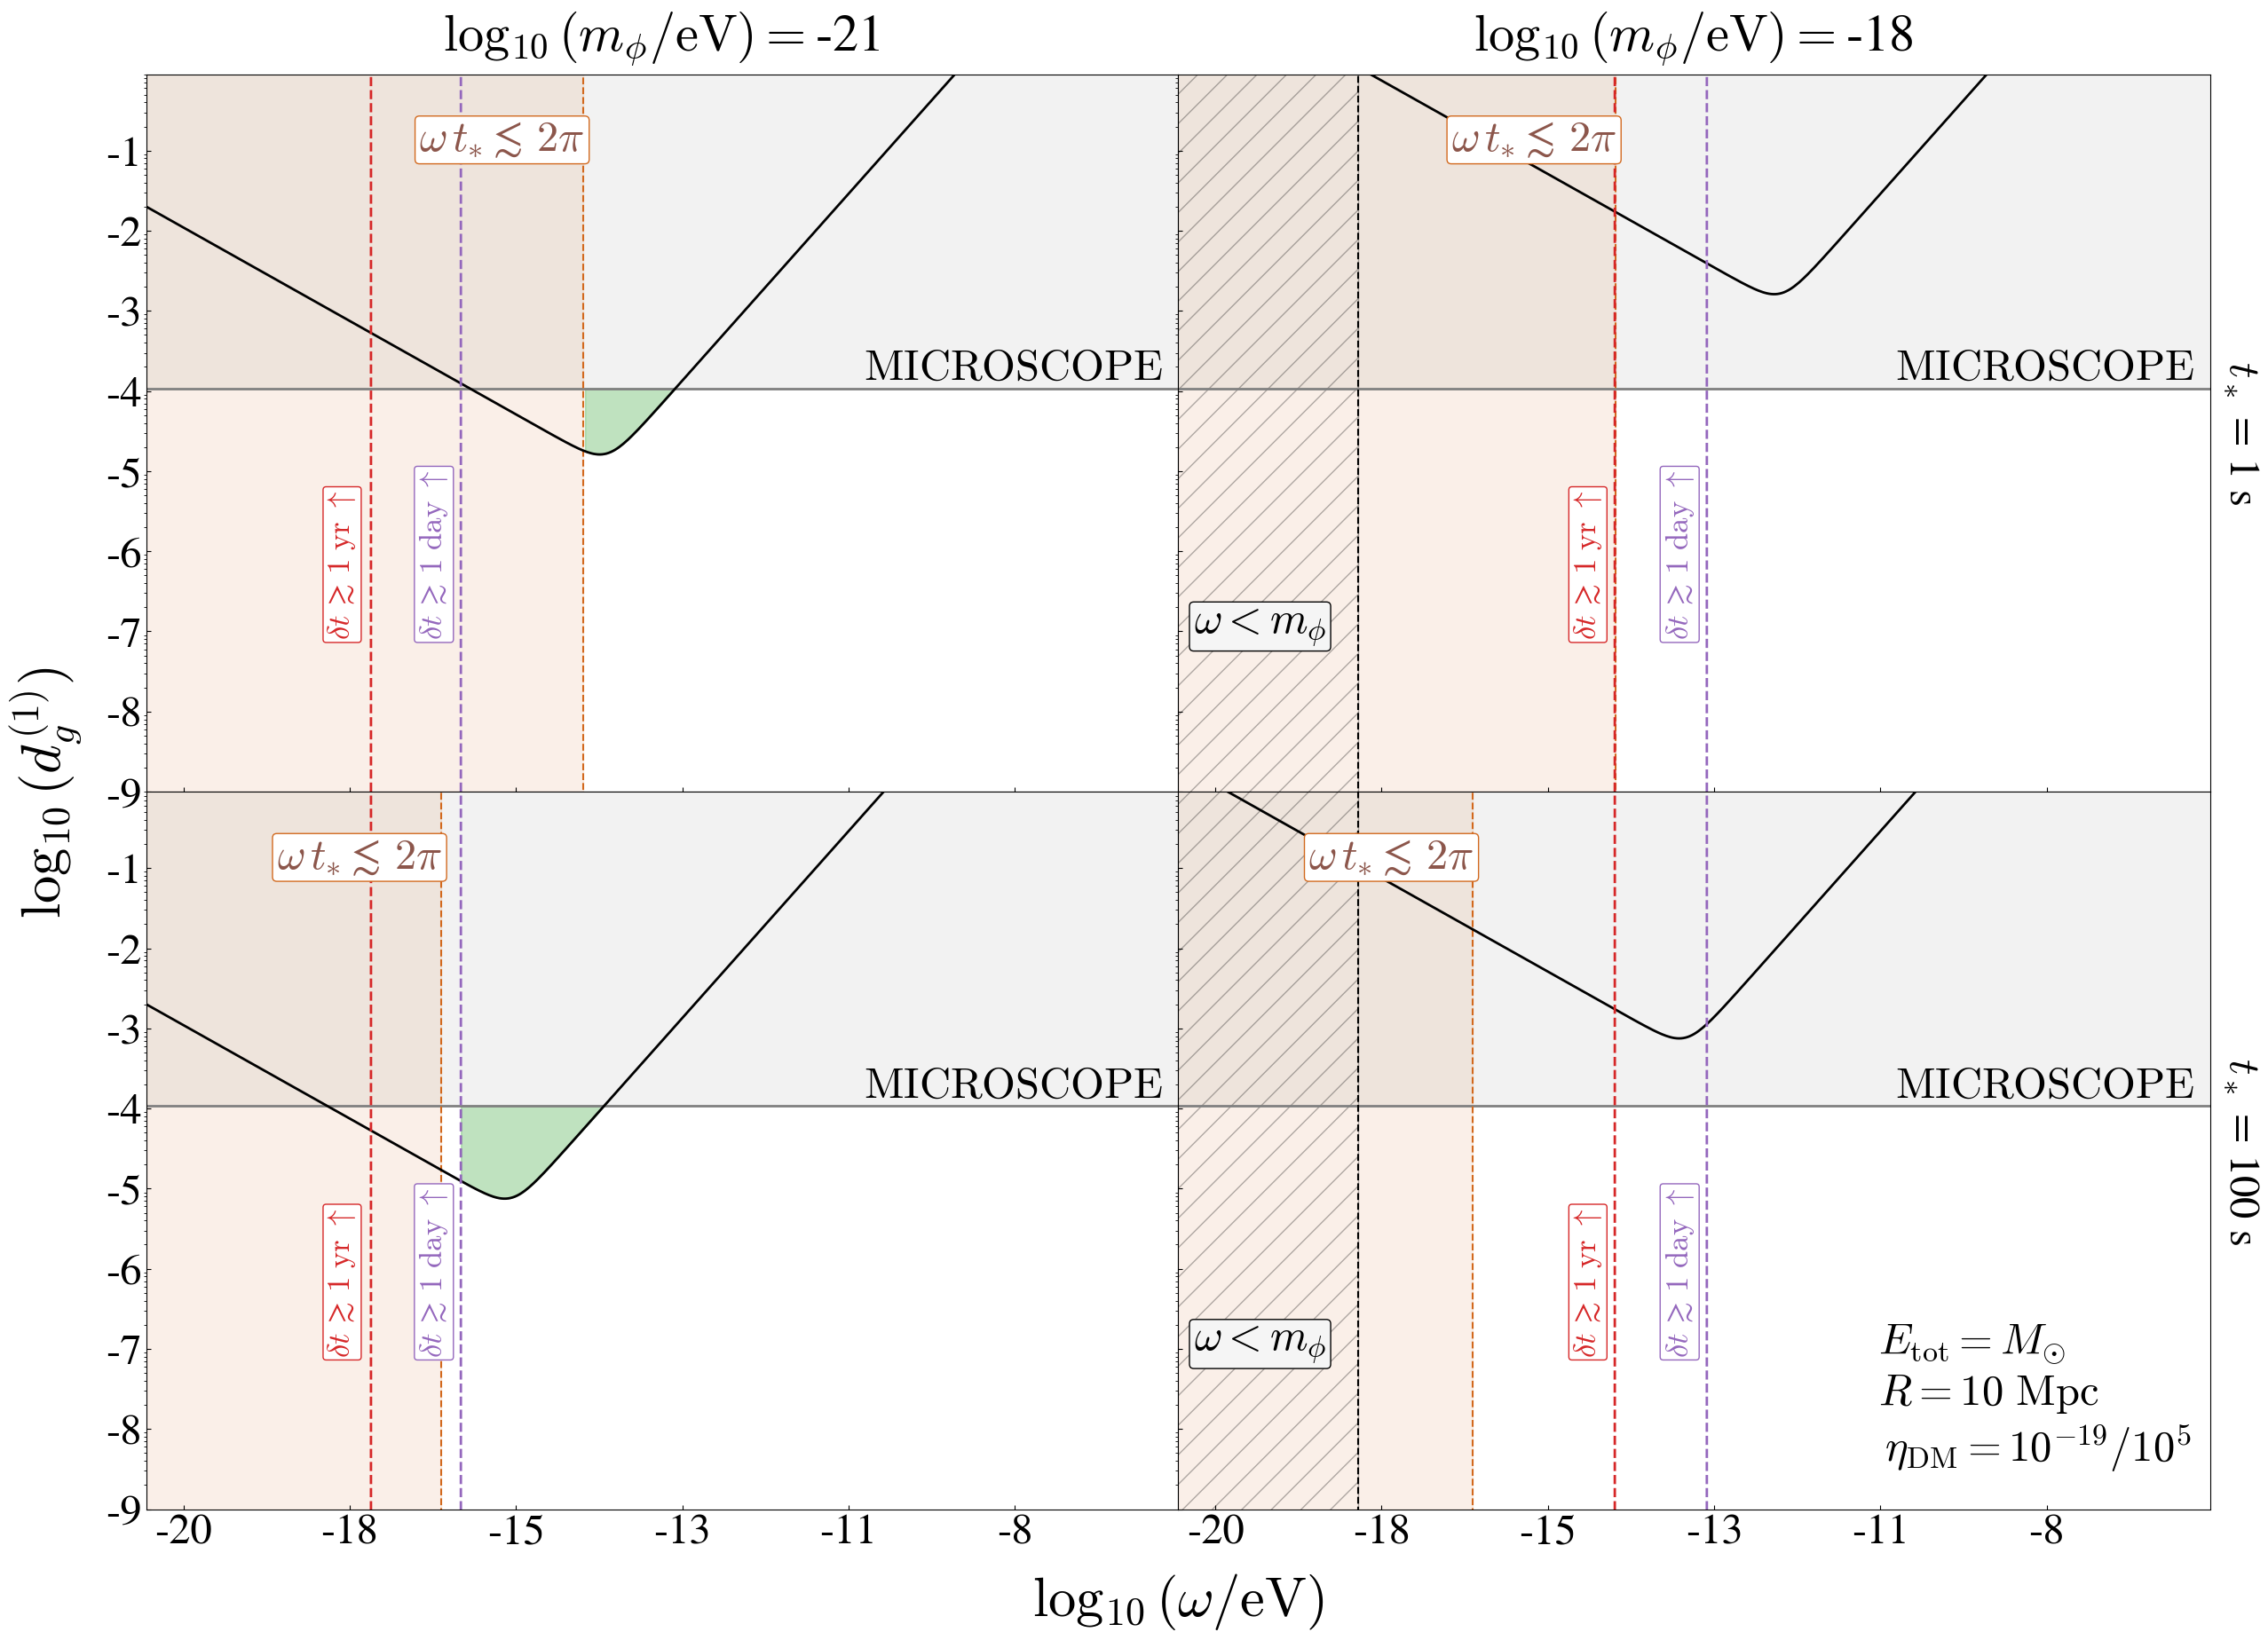

41272144962.30453 1.063632728457079e+25
41272144790.05909 1.063632728457079e+25
41272144962.30453 1.063632728457079e+25
41272144790.05909 1.063632728457079e+25


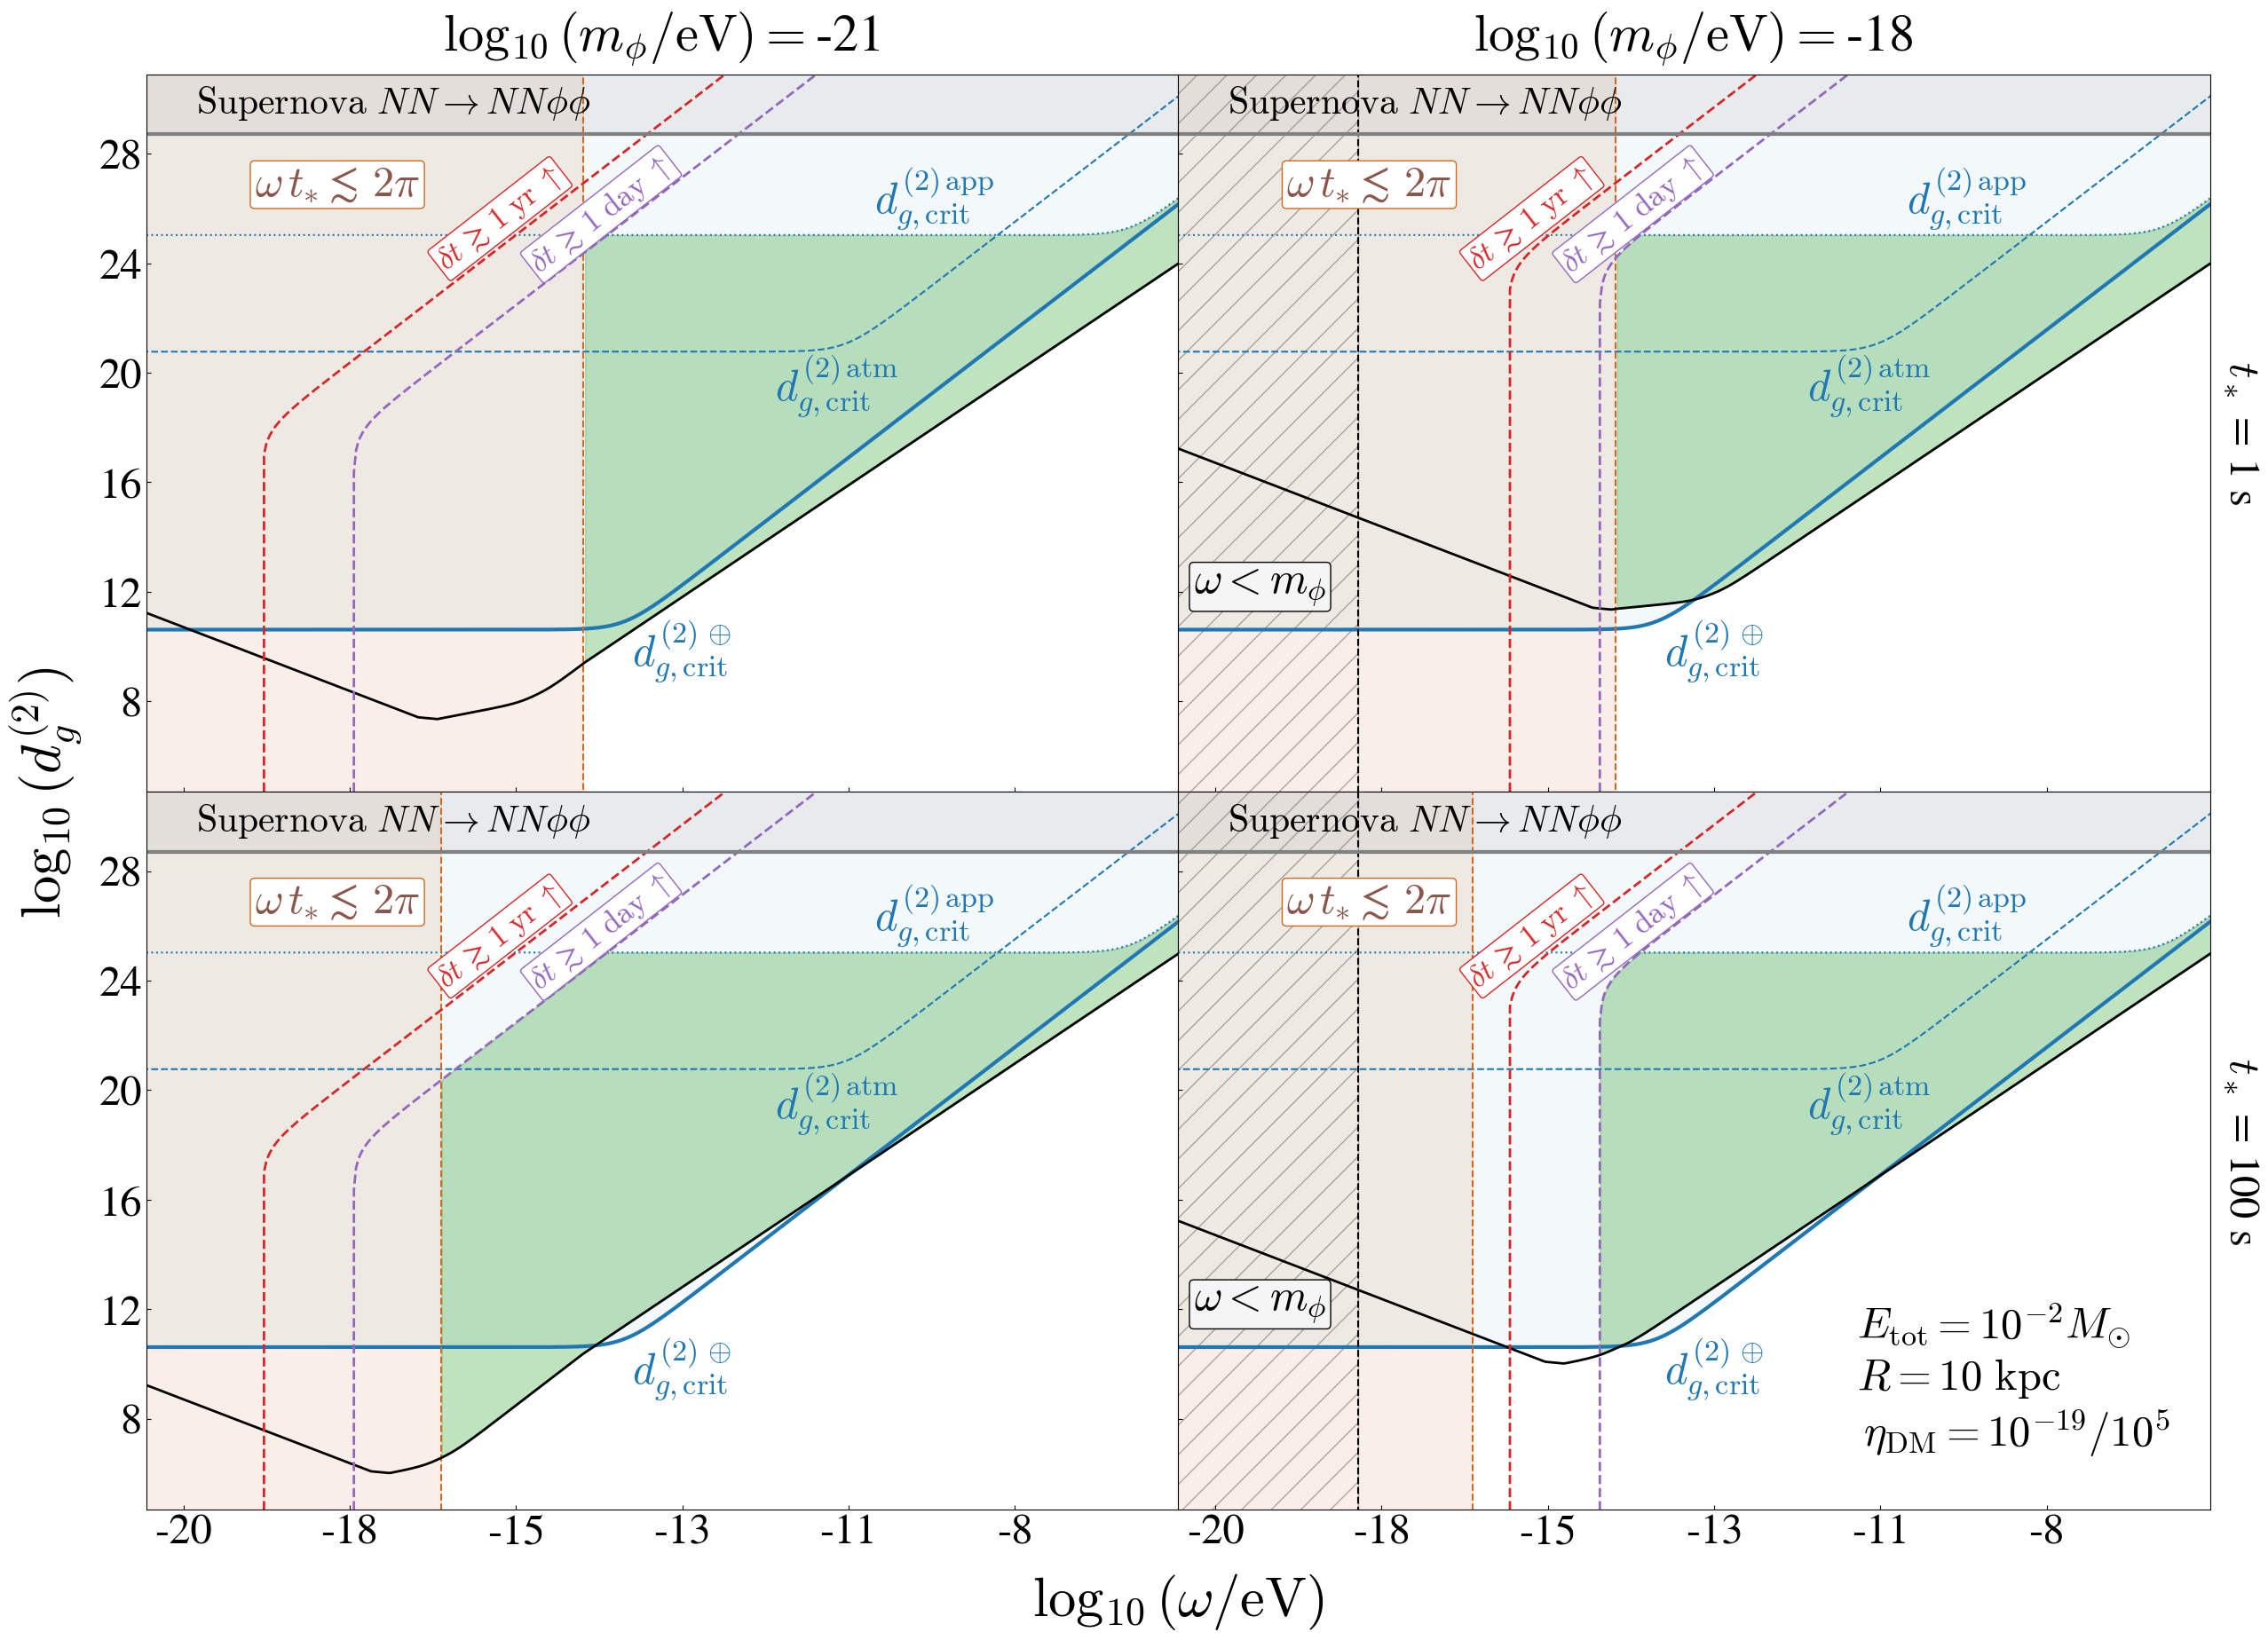

41272144962.30453 1.063632728457079e+25
41272144790.05909 1.063632728457079e+25
41272144962.30453 1.063632728457079e+25
41272144790.05909 1.063632728457079e+25


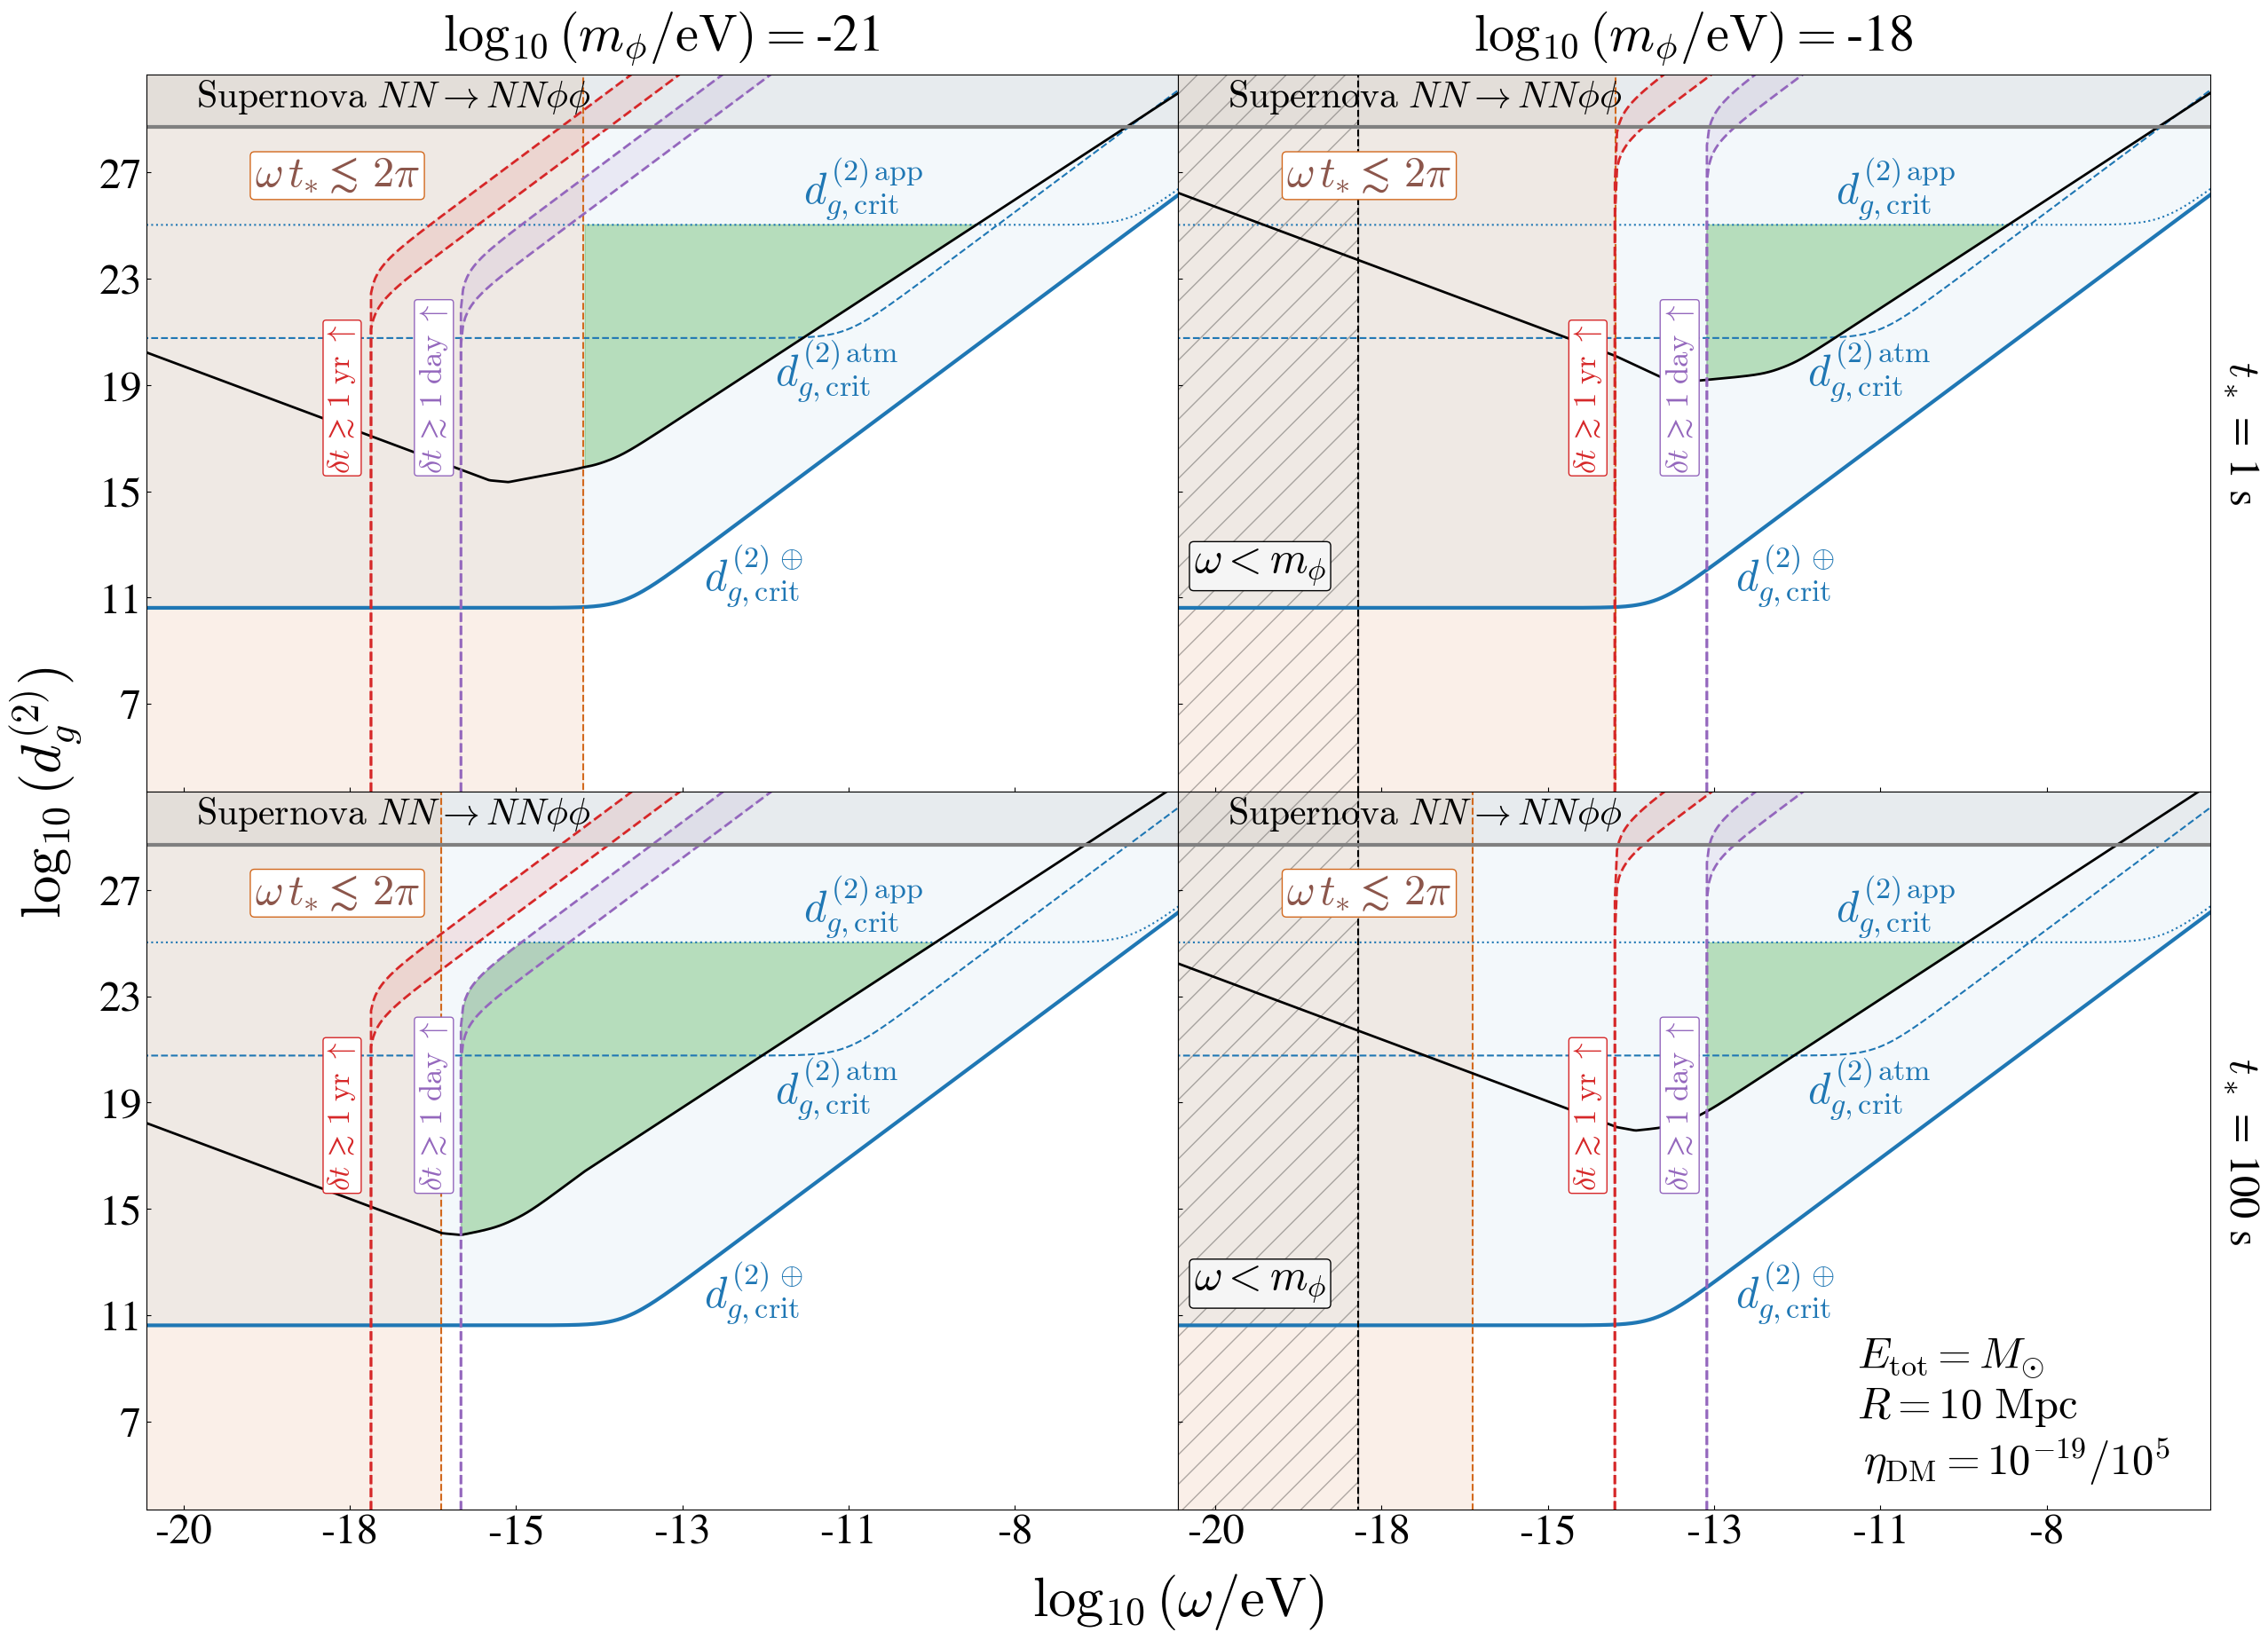

In [6]:
for i in coupling_types:
    for j in coupling_orders:
        plots(R_GC,E_GC,i,j)
        plots(R_EG,E_EG,i,j)